#   {بسم الله الرحمن الرحيم إِنِّي تَوَكَّلْتُ على الله رَبِّي وَرَبِّكُمْ} 

## Project Description: Lung Cancer Prediction Using Machine Learning Classification
## Objective
## The objective of this project is to develop a machine learning model to predict the likelihood of an individual having lung cancer based on various health indicators and demographic information. This model aims to assist healthcare professionals in early detection and diagnosis, potentially leading to timely interventions and better patient outcomes.

# ==============================================================

## Dataset Overview
## The dataset consists of 310 records with 16 features, including both categorical and numerical data. The target variable is LUNG_CANCER, which indicates whether the individual has been diagnosed with lung cancer (YES or NO).

## Features and Their Descriptions


### 1. GENDER
### Description: Indicates the gender of the individual.
### Categories:
### M: Male
### F: Female
### Significance: Gender can be an important factor in determining the risk of lung cancer. Different genders might have different risk factors and susceptibilities.
### 2. AGE
### Description: Age of the individual in years.
### Range: 56 to 74 years.
### Significance: Age is a critical factor in the development of lung cancer, with older individuals generally at higher risk.
### 3. SMOKING
### Description: Indicates whether the individual smokes or not.
### Categories:
### 1: No
### 2: Yes
### Significance: Smoking is a primary risk factor for lung cancer. Higher smoking levels correlate strongly with increased lung cancer risk.
### 4. YELLOW_FINGERS
### Description: Indicates if the individual has yellow fingers, a potential sign of heavy smoking.
### Categories:
### 1: No
### 2: Yes
### Significance: Yellow fingers can be an indicator of long-term smoking, which is a major risk factor for lung cancer.
### 5. ANXIETY
### Description: Indicates if the individual experiences anxiety.
### Categories:
### 1: No
### 2: Yes
### Significance: Anxiety could be related to smoking habits or overall health, indirectly influencing lung cancer risk.
### 6. PEER_PRESSURE
### Description: Indicates if the individual experiences peer pressure.
### Categories:
### 1: No
### 2: Yes
### Significance: Peer pressure might influence smoking habits, especially in younger individuals.
### 7. CHRONIC DISEASE
### Description: Indicates if the individual has any chronic disease.
### Categories:
### 1: No
### 2: Yes
### Significance: Chronic diseases can impact overall health and might be linked with increased cancer risk.
### 8. FATIGUE
### Description: Indicates if the individual experiences fatigue.
### Categories:
### 1: No
### 2: Yes
### Significance: Fatigue might be a symptom of underlying health issues, including chronic diseases and cancer.
### 9. ALLERGY
### Description: Indicates if the individual has allergies.
### Categories:
### 1: No
### 2: Yes
### Significance: Allergies might not be directly related to lung cancer but could affect overall respiratory health.
### 10. WHEEZING
### Description: Indicates if the individual experiences wheezing.
### Categories:
### 1: No
### 2: Yes
### Significance: Wheezing can be a symptom of respiratory issues, including chronic obstructive pulmonary disease (COPD), which is a risk factor for lung cancer.
### 11. ALCOHOL CONSUMING
### Description: Indicates if the individual consumes alcohol.
### Categories:
### 1: No
### 2: Yes
### Significance: Alcohol consumption can be associated with overall lifestyle factors that might impact cancer risk.
### 12. COUGHING
### Description: Indicates if the individual experiences coughing.
### Categories:
### 1: No
### 2: Yes
### Significance: Persistent coughing is a common symptom of lung issues, including lung cancer.
### 13. SHORTNESS OF BREATH
### Description: Indicates if the individual experiences shortness of breath.
### Categories:
### 1: No
### 2: Yes
### Significance: Shortness of breath can be a symptom of lung disease and is often associated with lung cancer.
### 14. SWALLOWING DIFFICULTY
### Description: Indicates if the individual experiences difficulty swallowing.
### Categories:
### 1: No
### 2: Yes
### Significance: Difficulty swallowing can be a symptom of serious health issues, including cancer.
### 15. CHEST PAIN
### Description: Indicates if the individual experiences chest pain.
### Categories:
### 1: No
### 2: Yes
### Significance: Chest pain can be a symptom of heart and lung issues, including lung cancer.
### 16. LUNG_CANCER
### Description: Indicates if the individual has been diagnosed with lung cancer.
### Categories:
### YES
### NO
### Significance: This is the target variable for prediction. Understanding the distribution of lung cancer diagnoses and their association with other features is crucial.

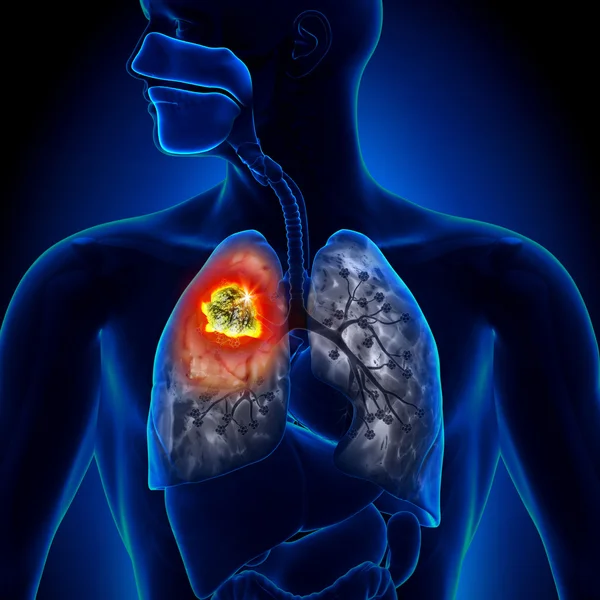

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import os
import warnings 
warnings.filterwarnings("ignore")


# preprocessing
from scipy.stats import norm
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , Normalizer 
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict , RandomizedSearchCV
from sklearn.metrics import mean_squared_error , accuracy_score ,balanced_accuracy_score , auc

from sklearn.metrics import confusion_matrix , classification_report , precision_recall_curve , make_scorer

# Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Load Data

In [2]:
path = r"D:\ML_data\survey lung cancer.csv"

if os.path.exists(path):
    df = pd.read_csv(path)
    print(df.head())
    
else:
    print("Sorry , Your Path File Not Found ")

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
# Show Some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [8]:
df.describe(include="object").T

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,309,2,M,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,309.0,NaN,NaN,NaN,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,NaN,NaN,NaN,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,NaN,NaN,NaN,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,NaN,NaN,NaN,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,NaN,NaN,NaN,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,NaN,NaN,NaN,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,NaN,NaN,NaN,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,NaN,NaN,NaN,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,NaN,NaN,NaN,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [10]:
df.shape

(309, 16)

In [11]:
# Check Null
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
pd.DataFrame(df["LUNG_CANCER"].value_counts().T)

,count
LUNG_CANCER,
YES,270
NO,39


In [13]:
df.groupby(df["LUNG_CANCER"]).mean("object")

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,
NO,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692
YES,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593


In [14]:
df.groupby(df["LUNG_CANCER"]).mean("int")

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,
NO,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692
YES,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593


In [15]:
pd.DataFrame(df["GENDER"].value_counts().T)

,count
GENDER,
M,162
F,147


In [16]:
# Show unique Value Evry Features

cols_df = df.columns

for i in cols_df:
    result = len(df[i].value_counts())
    if result >= 2 and result < 5:
        print(f"Column: {i}")
        print(pd.DataFrame(df[i].value_counts()))
        print("=" * 50)
    else:
        continue

Column: GENDER
        count
GENDER       
M         162
F         147
Column: SMOKING
         count
SMOKING       
2          174
1          135
Column: YELLOW_FINGERS
                count
YELLOW_FINGERS       
2                 176
1                 133
Column: ANXIETY
         count
ANXIETY       
1          155
2          154
Column: PEER_PRESSURE
               count
PEER_PRESSURE       
2                155
1                154
Column: CHRONIC DISEASE
                 count
CHRONIC DISEASE       
2                  156
1                  153
Column: FATIGUE 
          count
FATIGUE        
2           208
1           101
Column: ALLERGY 
          count
ALLERGY        
2           172
1           137
Column: WHEEZING
          count
WHEEZING       
2           172
1           137
Column: ALCOHOL CONSUMING
                   count
ALCOHOL CONSUMING       
2                    172
1                    137
Column: COUGHING
          count
COUGHING       
2           179
1         

In [17]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Exploratory Data Analysis (EDA)

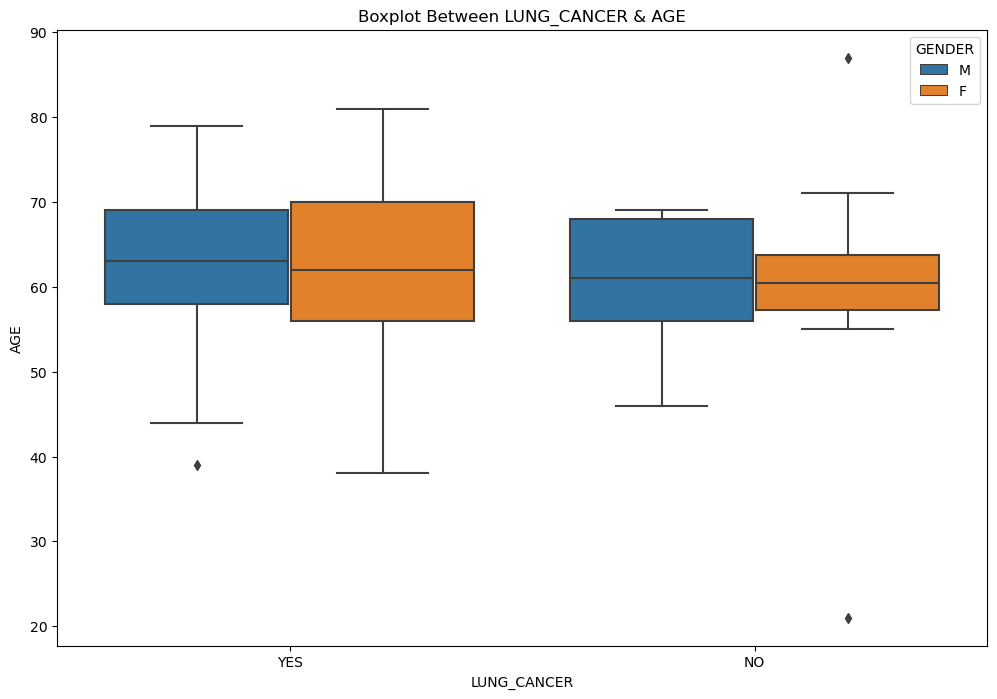

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df , x="LUNG_CANCER" , y="AGE" , hue="GENDER")
plt.xlabel("LUNG_CANCER")
plt.ylabel("AGE")
plt.title("Boxplot Between LUNG_CANCER & AGE")
plt.show()

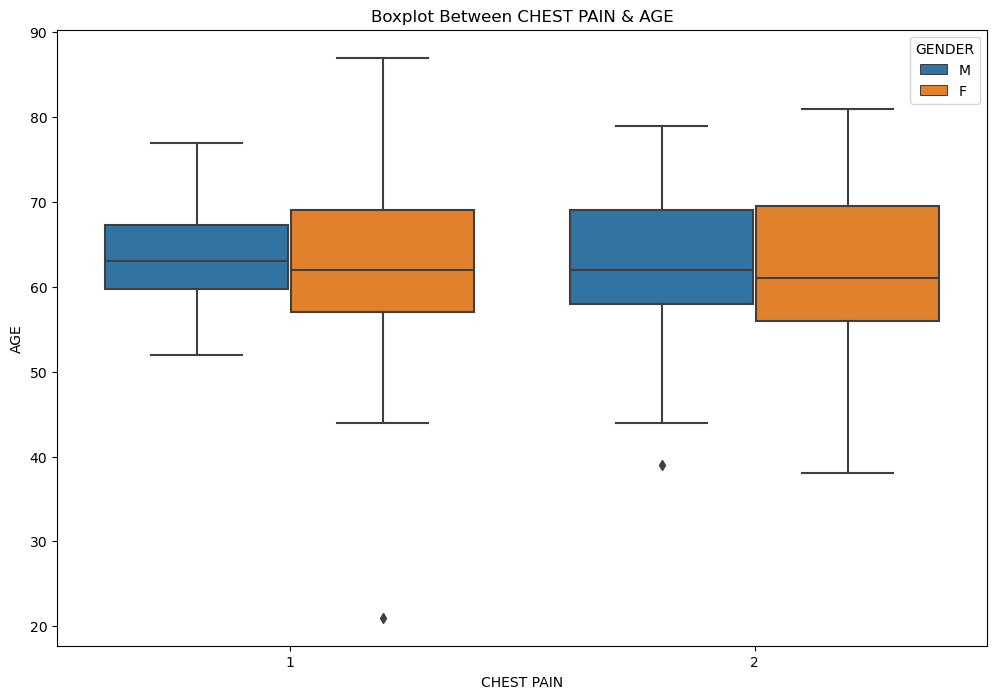

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df , x="CHEST PAIN" , y="AGE" , hue="GENDER")
plt.xlabel("CHEST PAIN")
plt.ylabel("AGE")
plt.title("Boxplot Between CHEST PAIN & AGE")
plt.show()

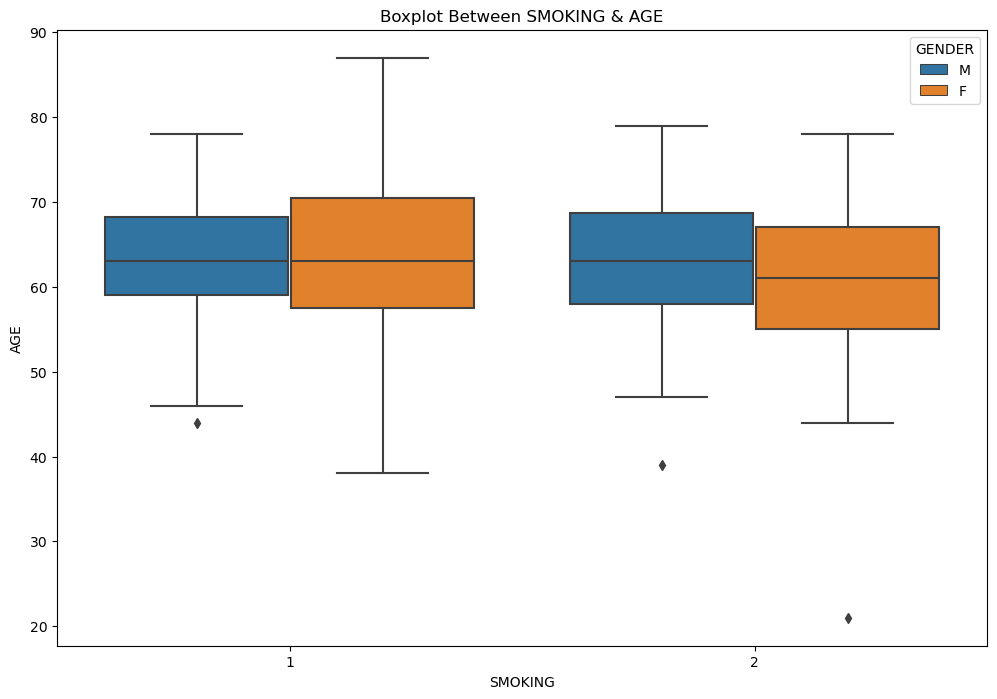

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df , x="SMOKING" , y="AGE" , hue="GENDER")
plt.xlabel("SMOKING")
plt.ylabel("AGE")
plt.title("Boxplot Between SMOKING & AGE")
plt.show()

In [21]:
pd.DataFrame(df.groupby(["LUNG_CANCER"]).value_counts())

count
LUNG_CANCER GENDER AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC DISEASE FATIGUE  ALLERGY  WHEEZING ALCOHOL CONSUMING COUGHING SHORTNESS OF BREATH SWALLOWING DIFFICULTY CHEST PAIN       
NO          F      63  1       1              1       1             2               2        1        1        1                 1        2                   1                     1               2
                   21  2       1              1       1             2               2        2        1        1                 1        2                   1                     1               1
            M      68  2       1              2       1             1               2        1        1        1                 1        1                   1                     1               1
                   69  2       1              1       1             1               1        2        2        2                 2        1                   1                     2               1
                                                      2             1               1        1        1        1                 1        1                   1                     2               1
...                                                                                                                                                                                               ...
YES         F      66  2       2              2       1             2               2        2        2        2                 2        2                   1                     1               1
                                                      2             1               2        1        2        1                 2        2                   2                     1               1
                   67  2       2              2       1             2               1        1        1        1                 1        2                   2                     2               1
                                                      2             1               2        1        1        1                 1        1                   1                     1               1
            M      79  2       1              1       1             2               2        2        1        2                 2        2                   2                     2               1

[276 rows x 1 columns]

In [22]:
def plot(col, data=df):
    grouped = df.groupby([col, "LUNG_CANCER"]).size().unstack(fill_value=0)
    normalized = grouped.div(grouped.sum(axis=1), axis=0)
    return normalized.plot(kind='bar', figsize=(8, 5))


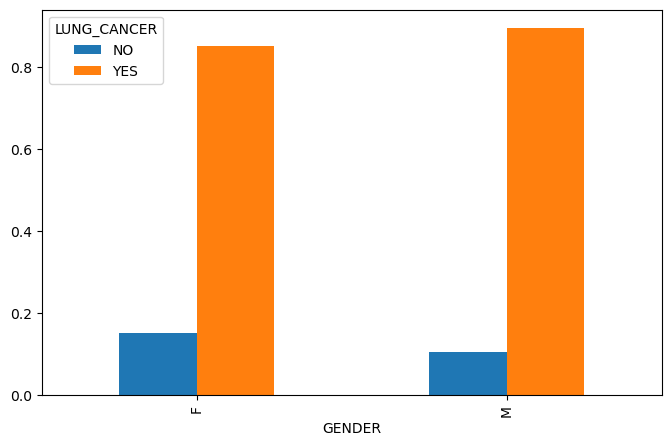

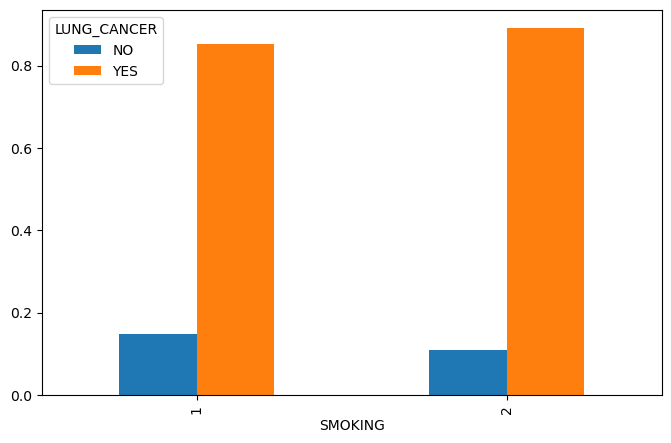

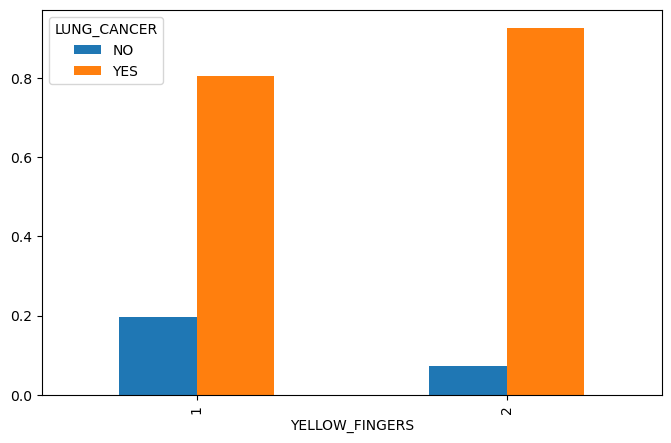

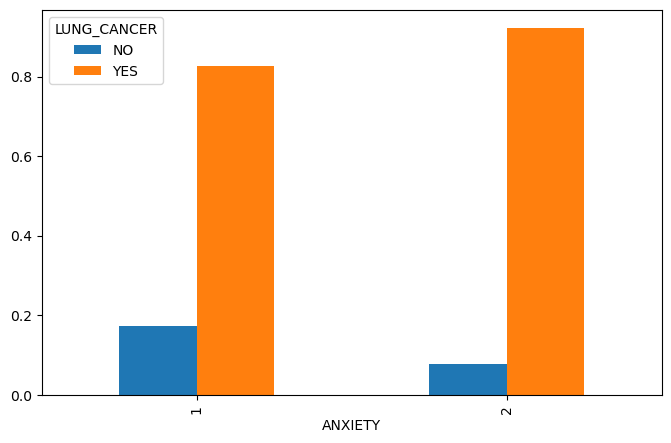

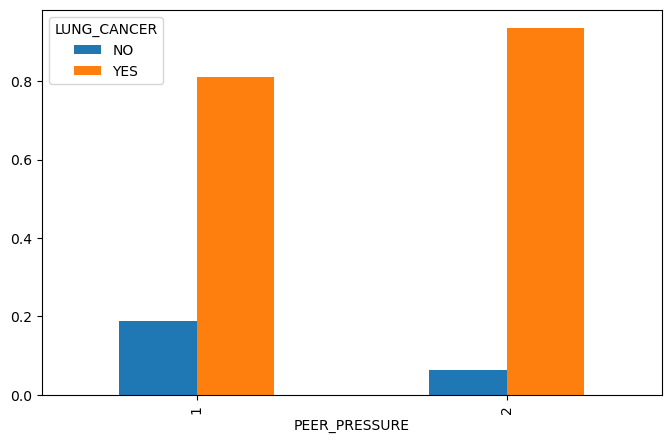

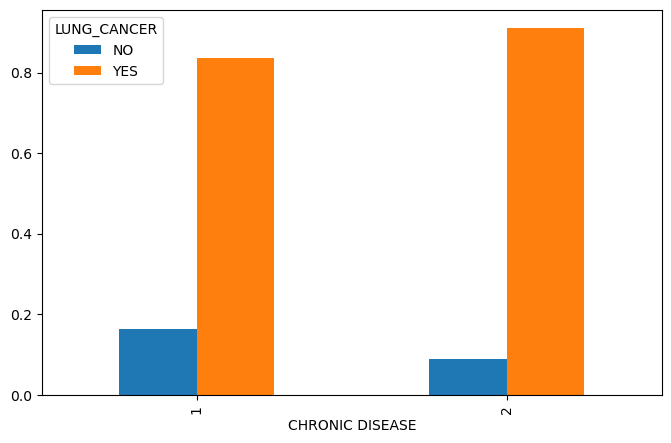

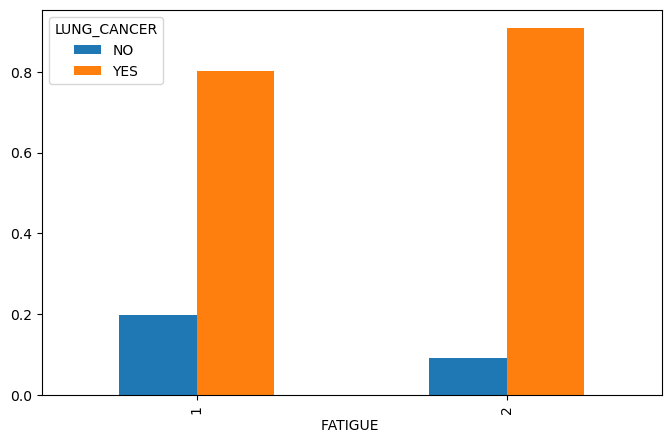

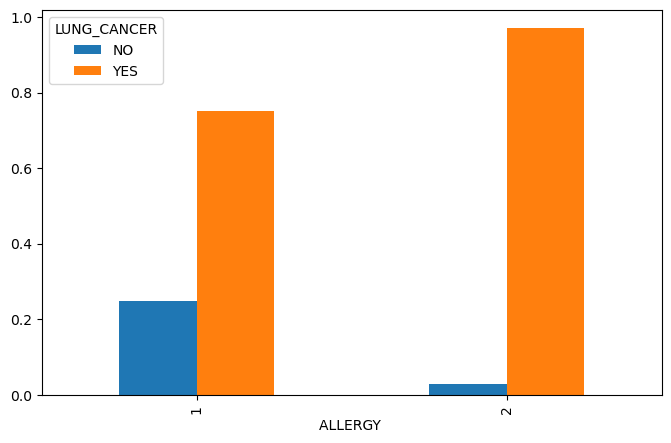

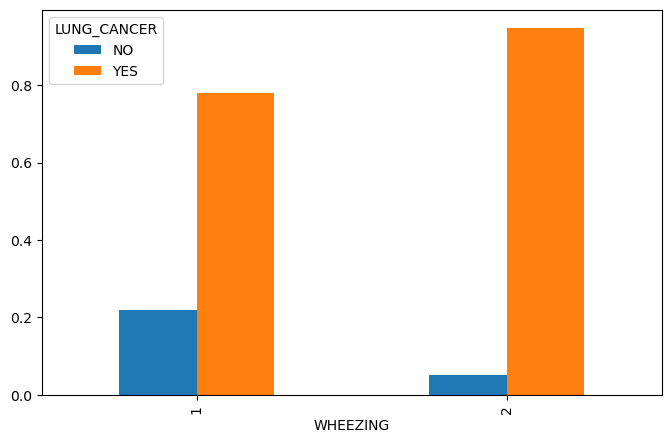

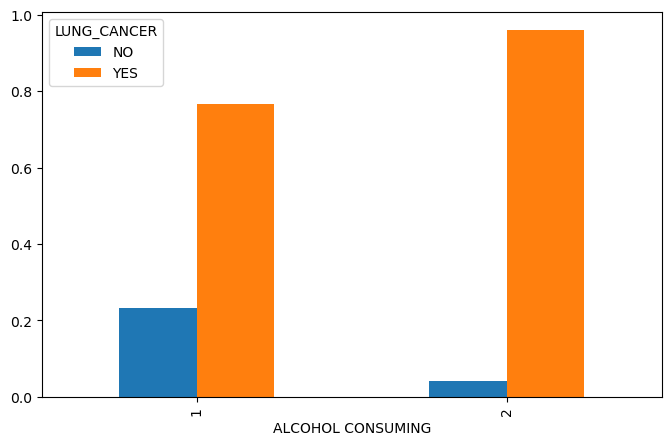

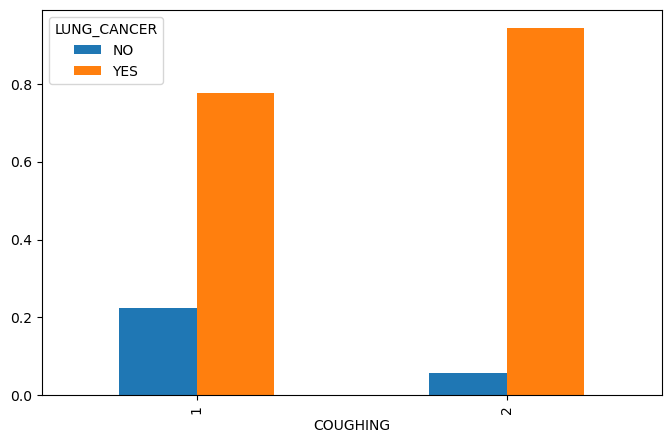

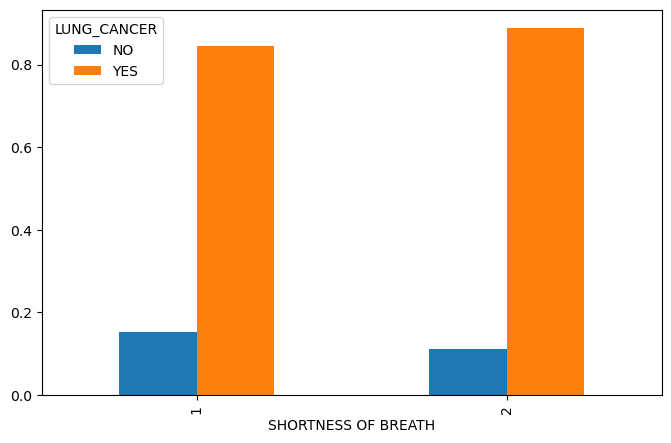

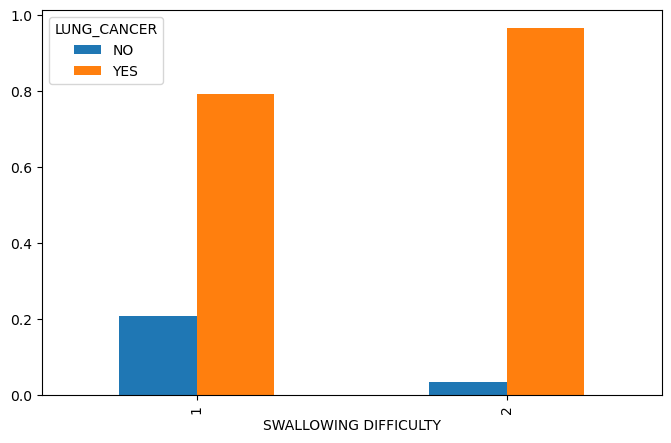

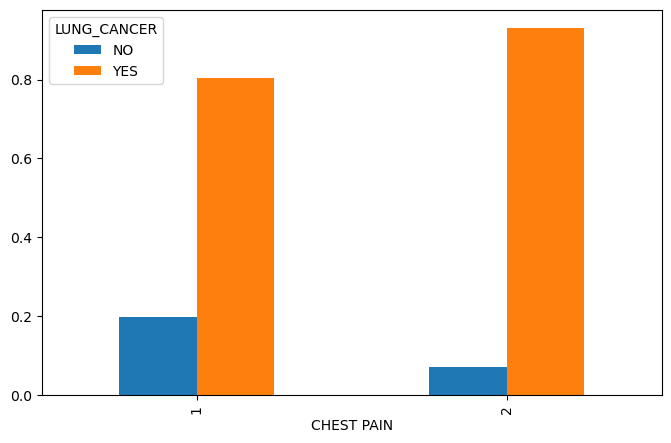

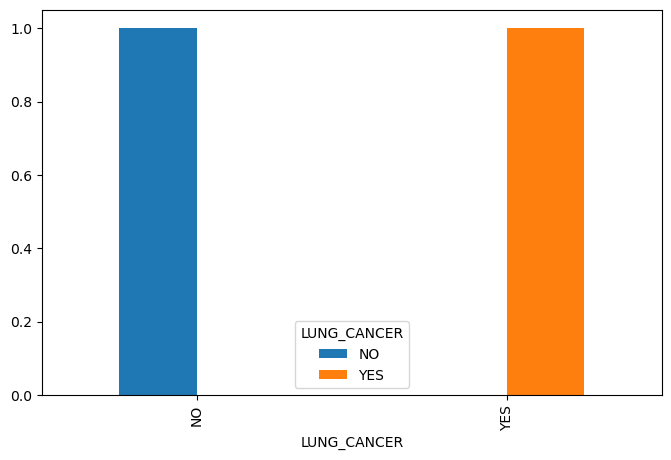

In [23]:
# Show unique Value Every Feature
cols_df = df.columns

for i in cols_df:
    result = len(df[i].value_counts())
    if 2 <= result < 5:
        plot(i)

<Figure size 1200x1000 with 0 Axes>

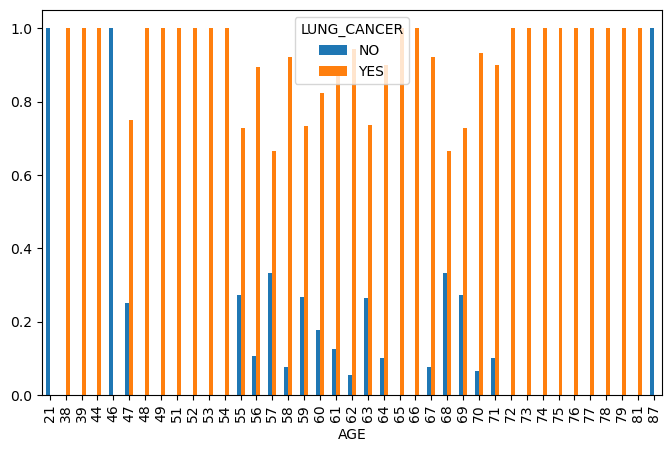

In [24]:
plt.figure(figsize=(12,10))
plot("AGE");

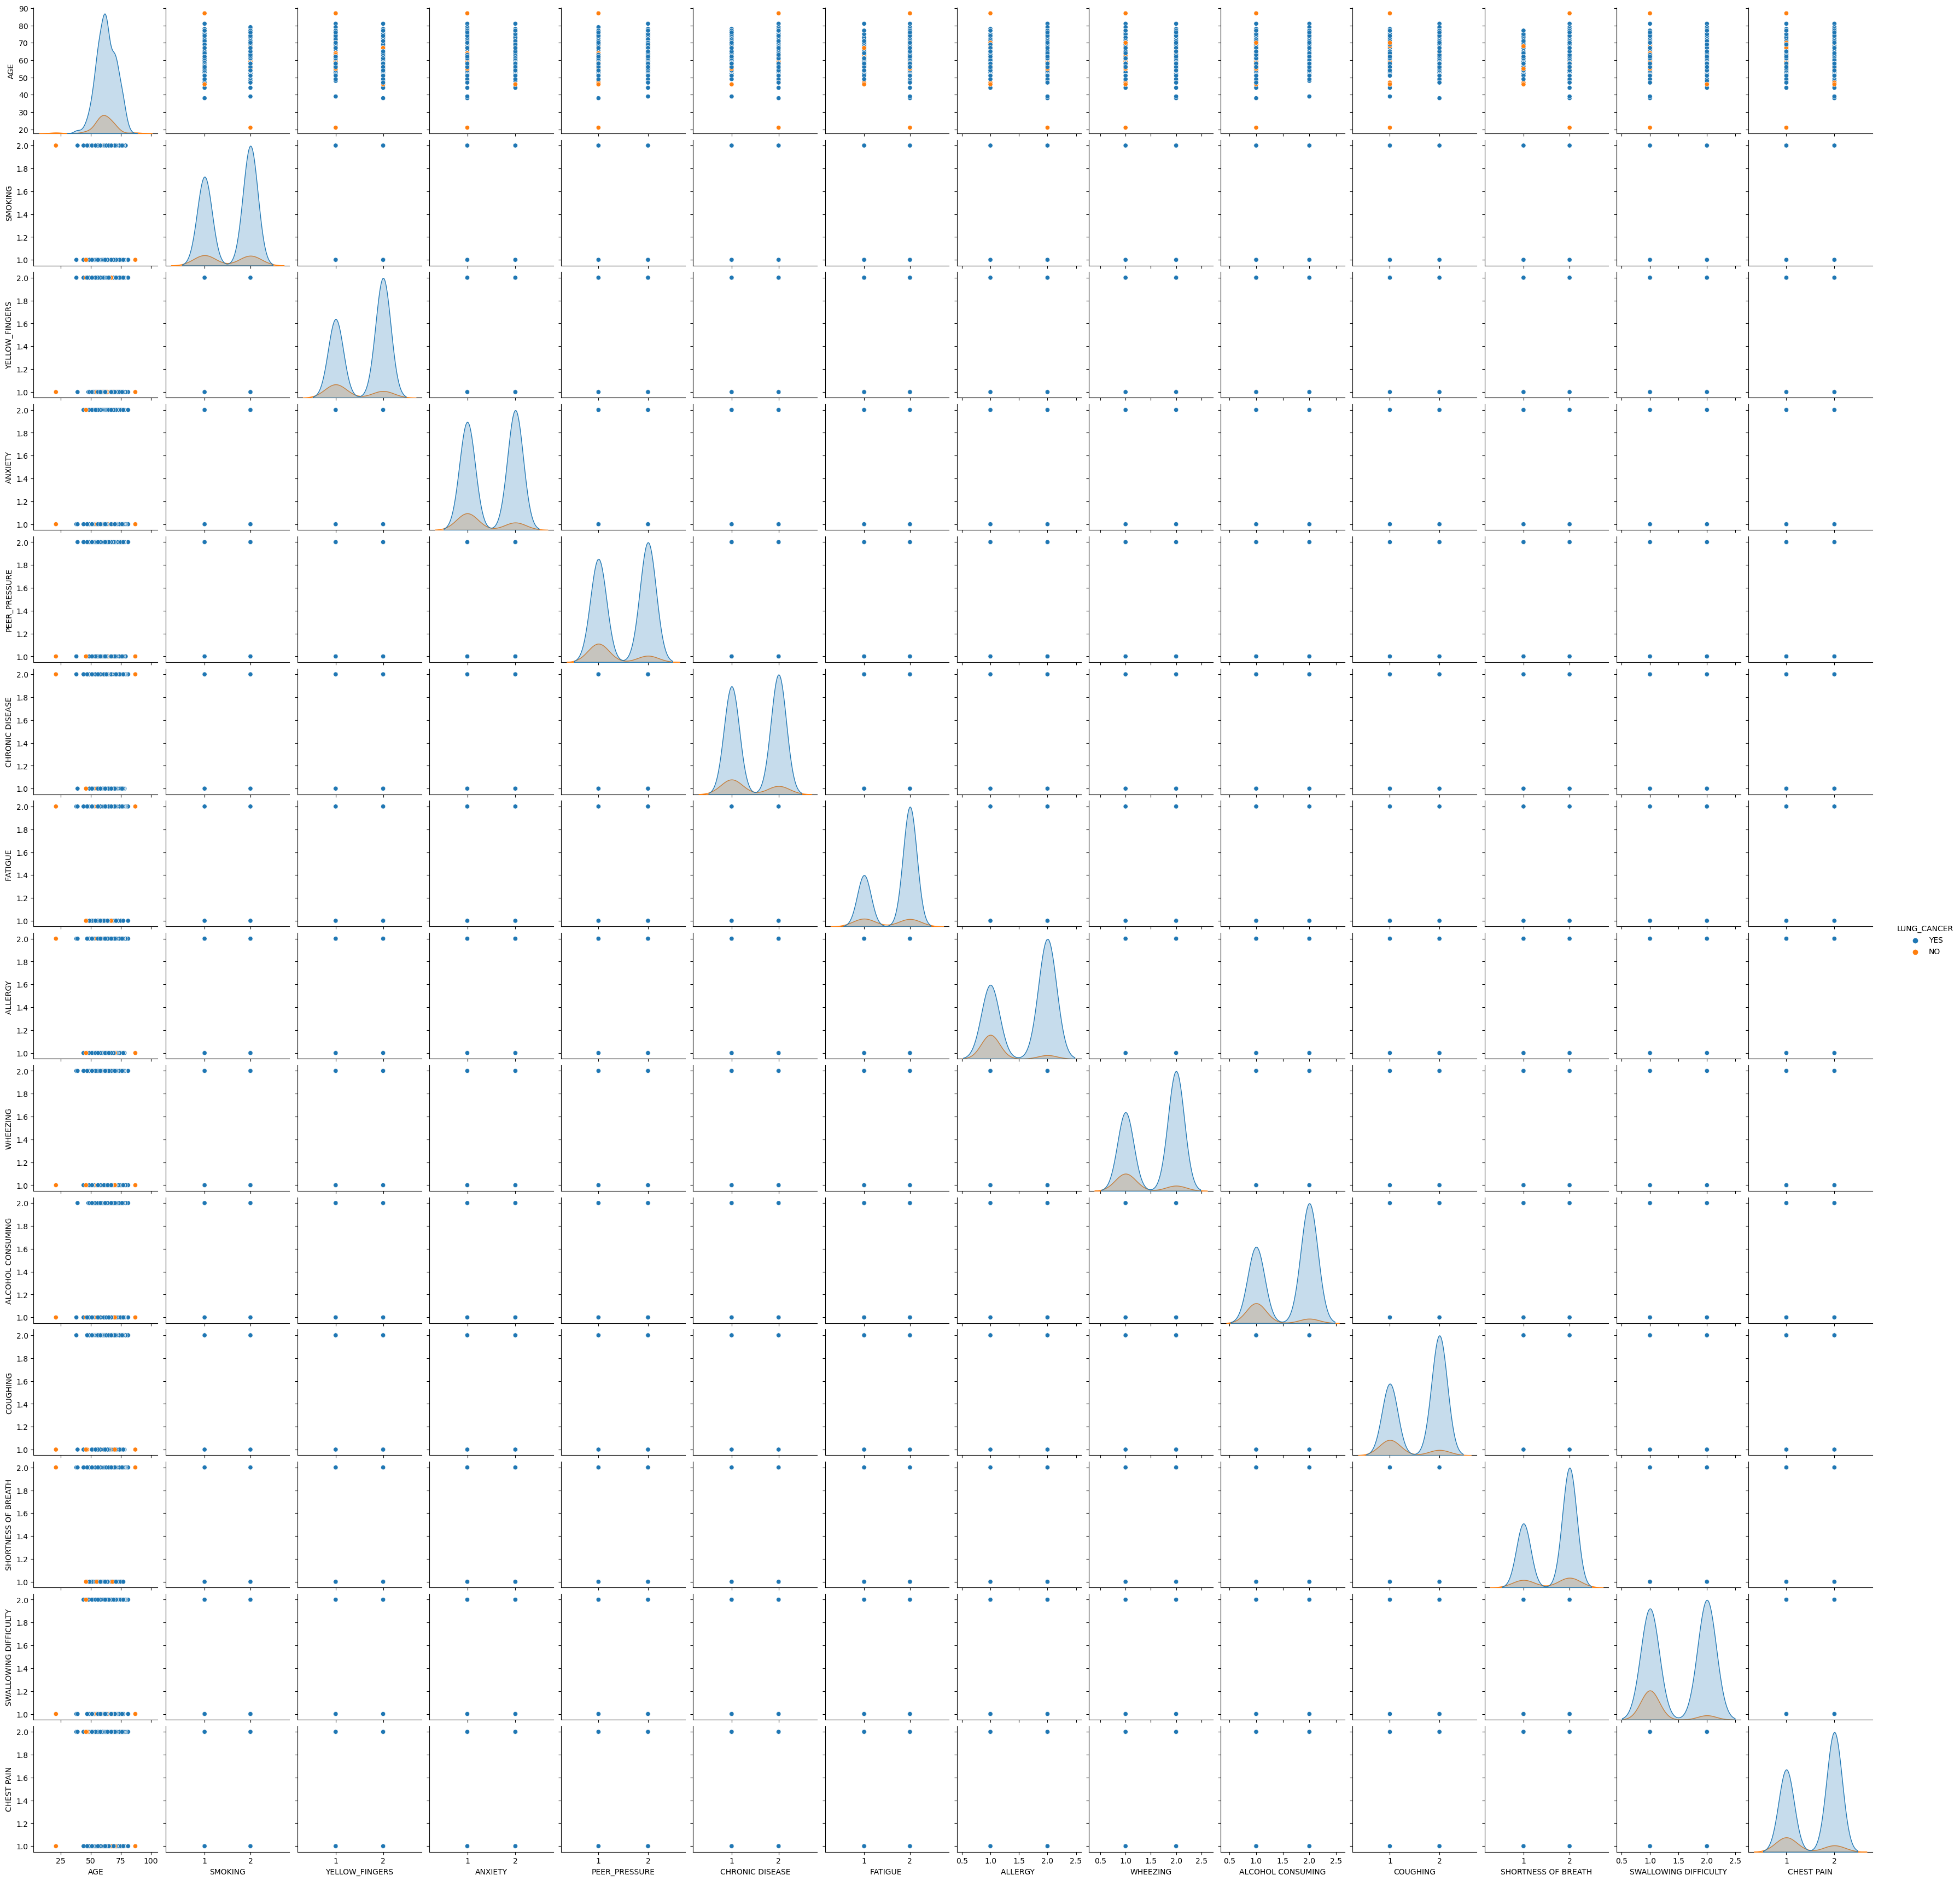

In [25]:
sns.pairplot(df , hue="LUNG_CANCER")
# plt.legend()
plt.show()

In [26]:
count_target = df.value_counts("LUNG_CANCER")
count_target

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

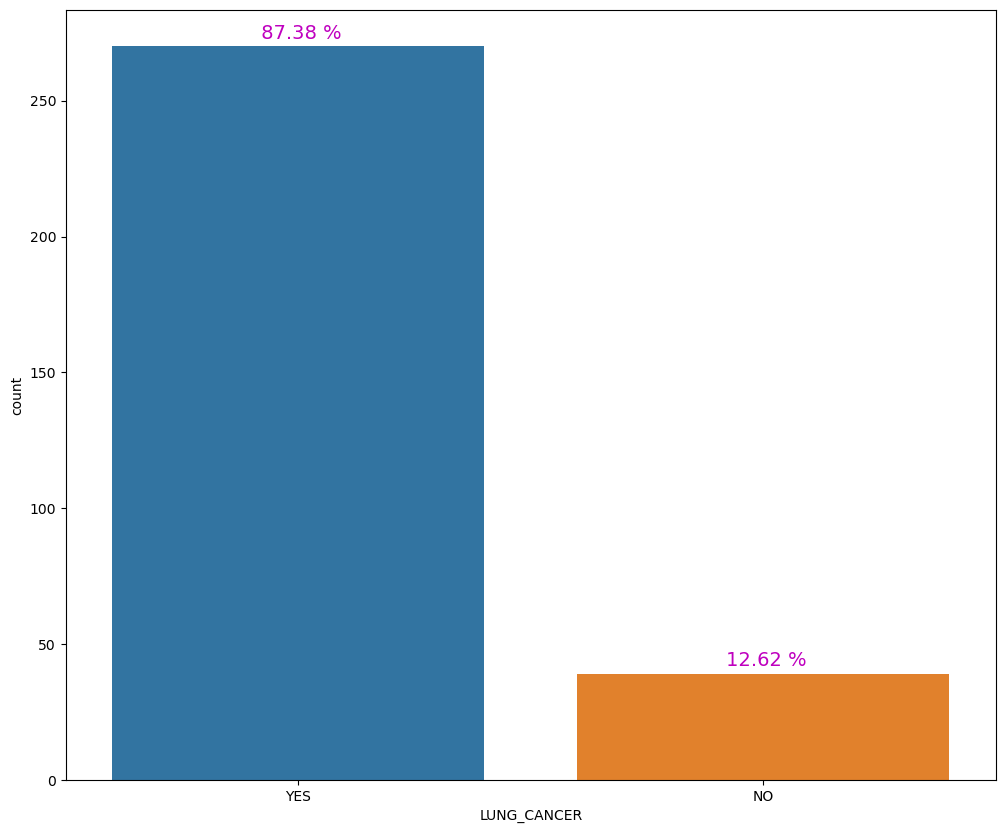

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(data=df , x="LUNG_CANCER" , order=count_target.index)

for i in range(count_target.shape[0]):
    count = count_target[i]
    perc = f" {100 * count/ df.shape[0]:.2f} %"
    plt.text(i , count + 3, perc , ha="center" , color="m" , fontsize="14")
plt.show()

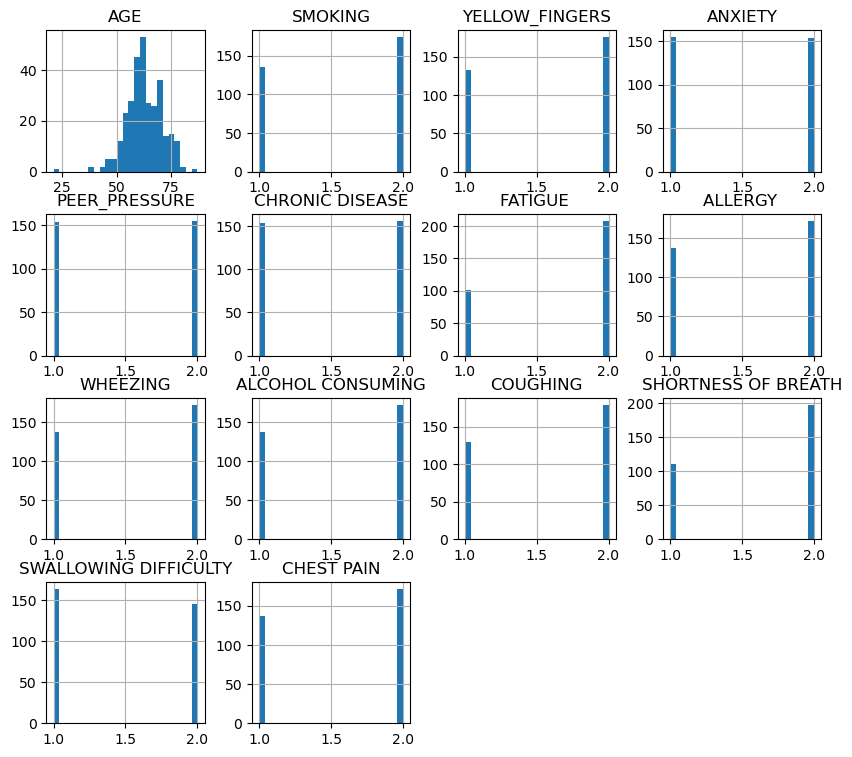

In [28]:
df.hist(bins=25 , figsize=(10,9))
plt.show()

In [29]:
nc = df._get_numeric_data()
nc

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [30]:
df.items()

<generator object DataFrame.items at 0x000001C613AC17B0>

In [31]:
c = df.apply(pd.to_numeric, errors='coerce') # Convert columns to numeric, set errors to NaN
c

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,NaN,69,1,2,2,1,1,2,1,2,2,2,2,2,2,NaN
1,NaN,74,2,1,1,1,2,2,2,1,1,1,2,2,2,NaN
2,NaN,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NaN
3,NaN,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NaN
4,NaN,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,NaN,56,1,1,1,2,2,2,1,1,2,2,2,2,1,NaN
305,NaN,70,2,1,1,1,1,2,2,2,2,2,2,1,2,NaN
306,NaN,58,2,1,1,1,1,1,2,2,2,2,1,1,2,NaN
307,NaN,67,2,1,2,1,1,2,2,1,2,2,2,1,2,NaN


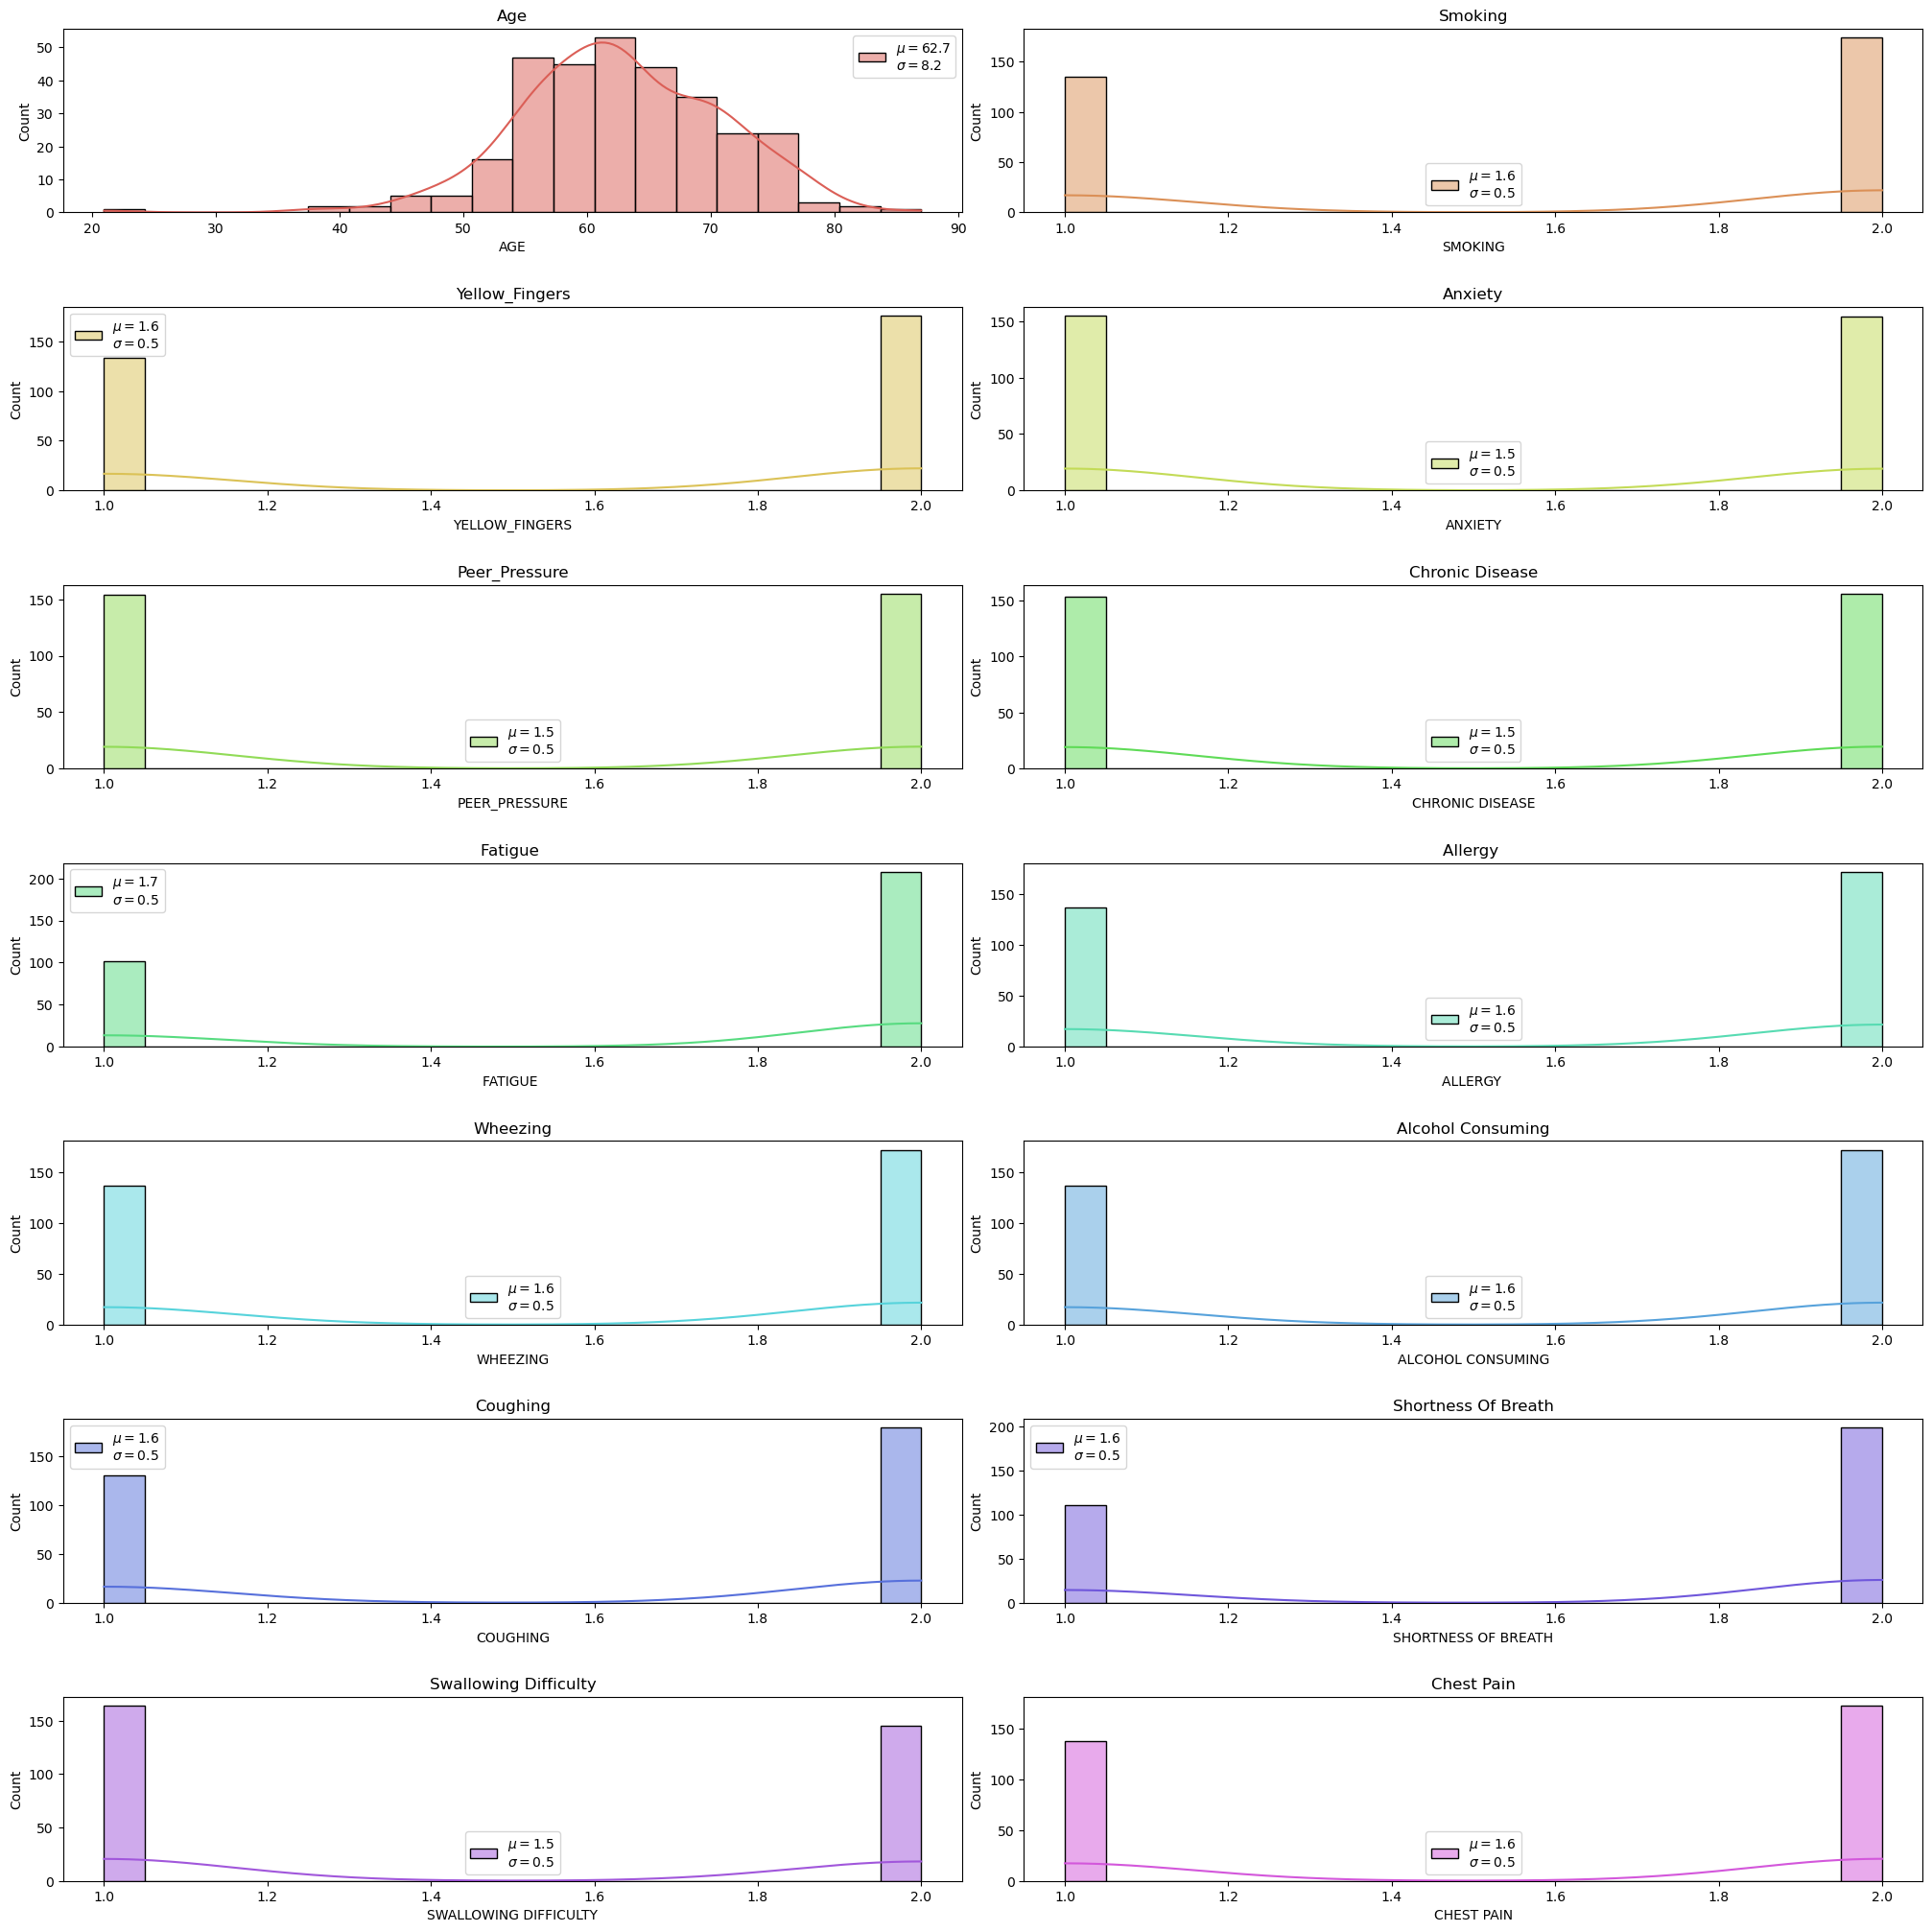

In [32]:
c = df.apply(pd.to_numeric, errors='coerce')   # Convert columns to numeric, set errors to NaN

# Ensure you have defined a list of colors with at least the required number of colors
colors = sns.color_palette("hls", len(c.columns))  

fig, ax = plt.subplots(7, 2, figsize=(20, 20))  # Adjusted for a larger figure
ax = ax.flatten()  # Flatten the array of axes to make indexing easier

i = 0
for k, v in c.items():
    v = v.dropna()  # Drop NaN values
    v = v[~v.isin([np.inf, -np.inf])]  # Remove infinite values
    
    if len(v) > 2:  # Proceed only if there are enough valid values
        mu, sigma = norm.fit(v)  # Fit the normal distribution
        sns.histplot(
            v,
            kde=True,
            bins=20,
            color=colors[i],
            ax=ax[i],
            label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$'
        )
        ax[i].set_title(f"{k.title()}")  # Correctly capitalize the title
        ax[i].legend()
        
        i += 1
        
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)  # Adjust layout
plt.show()

In [33]:
count_sex = df["GENDER"].value_counts()
count_sex

GENDER
M    162
F    147
Name: count, dtype: int64

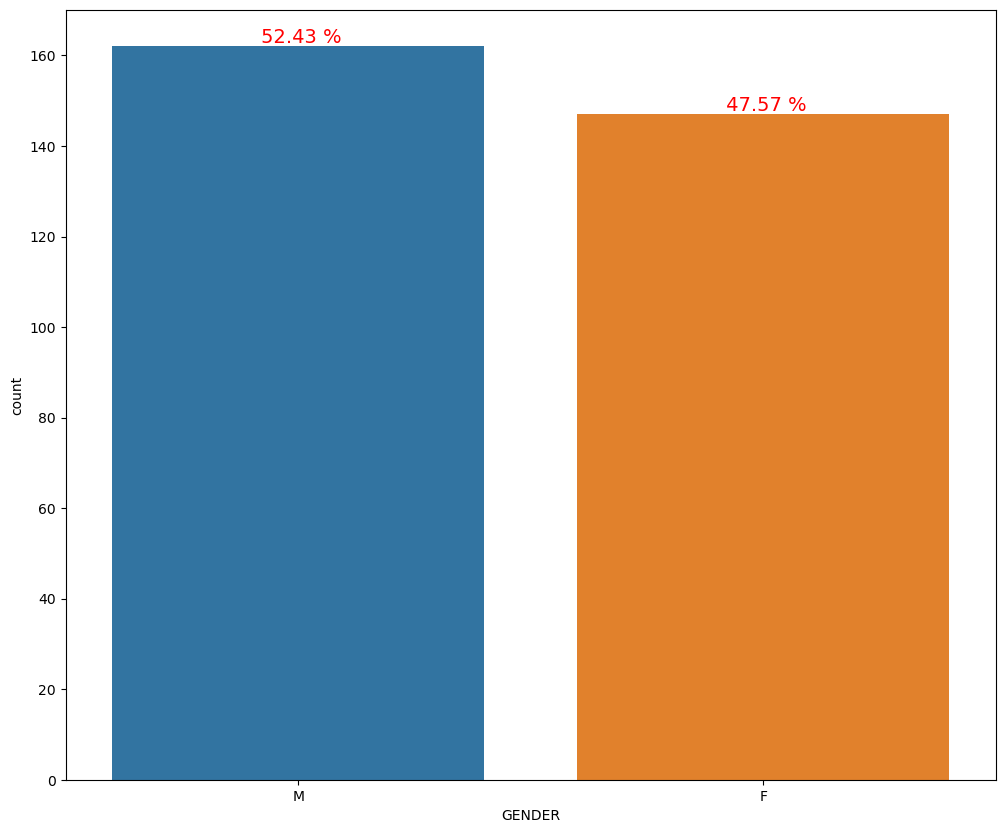

In [34]:
plt.figure(figsize=(12,10))
sns.countplot(data=df , x="GENDER" , order=count_sex.index)

for i in range(count_sex.shape[0]):
    count = count_sex[i]
    perc = f" {100 * count/ df.shape[0]:.2f} %"
    plt.text(i , count +0.75, perc , ha="center" , color="r" , fontsize="14")
plt.show()

In [35]:
# # First, we will change the data types of the categorical variables 
# df['LUNG_CANCER'] = df['LUNG_CANCER'].factorize(['NO','YES'])[0]
# df['GENDER'] = df['GENDER'].factorize(['NO','YES'])[0]

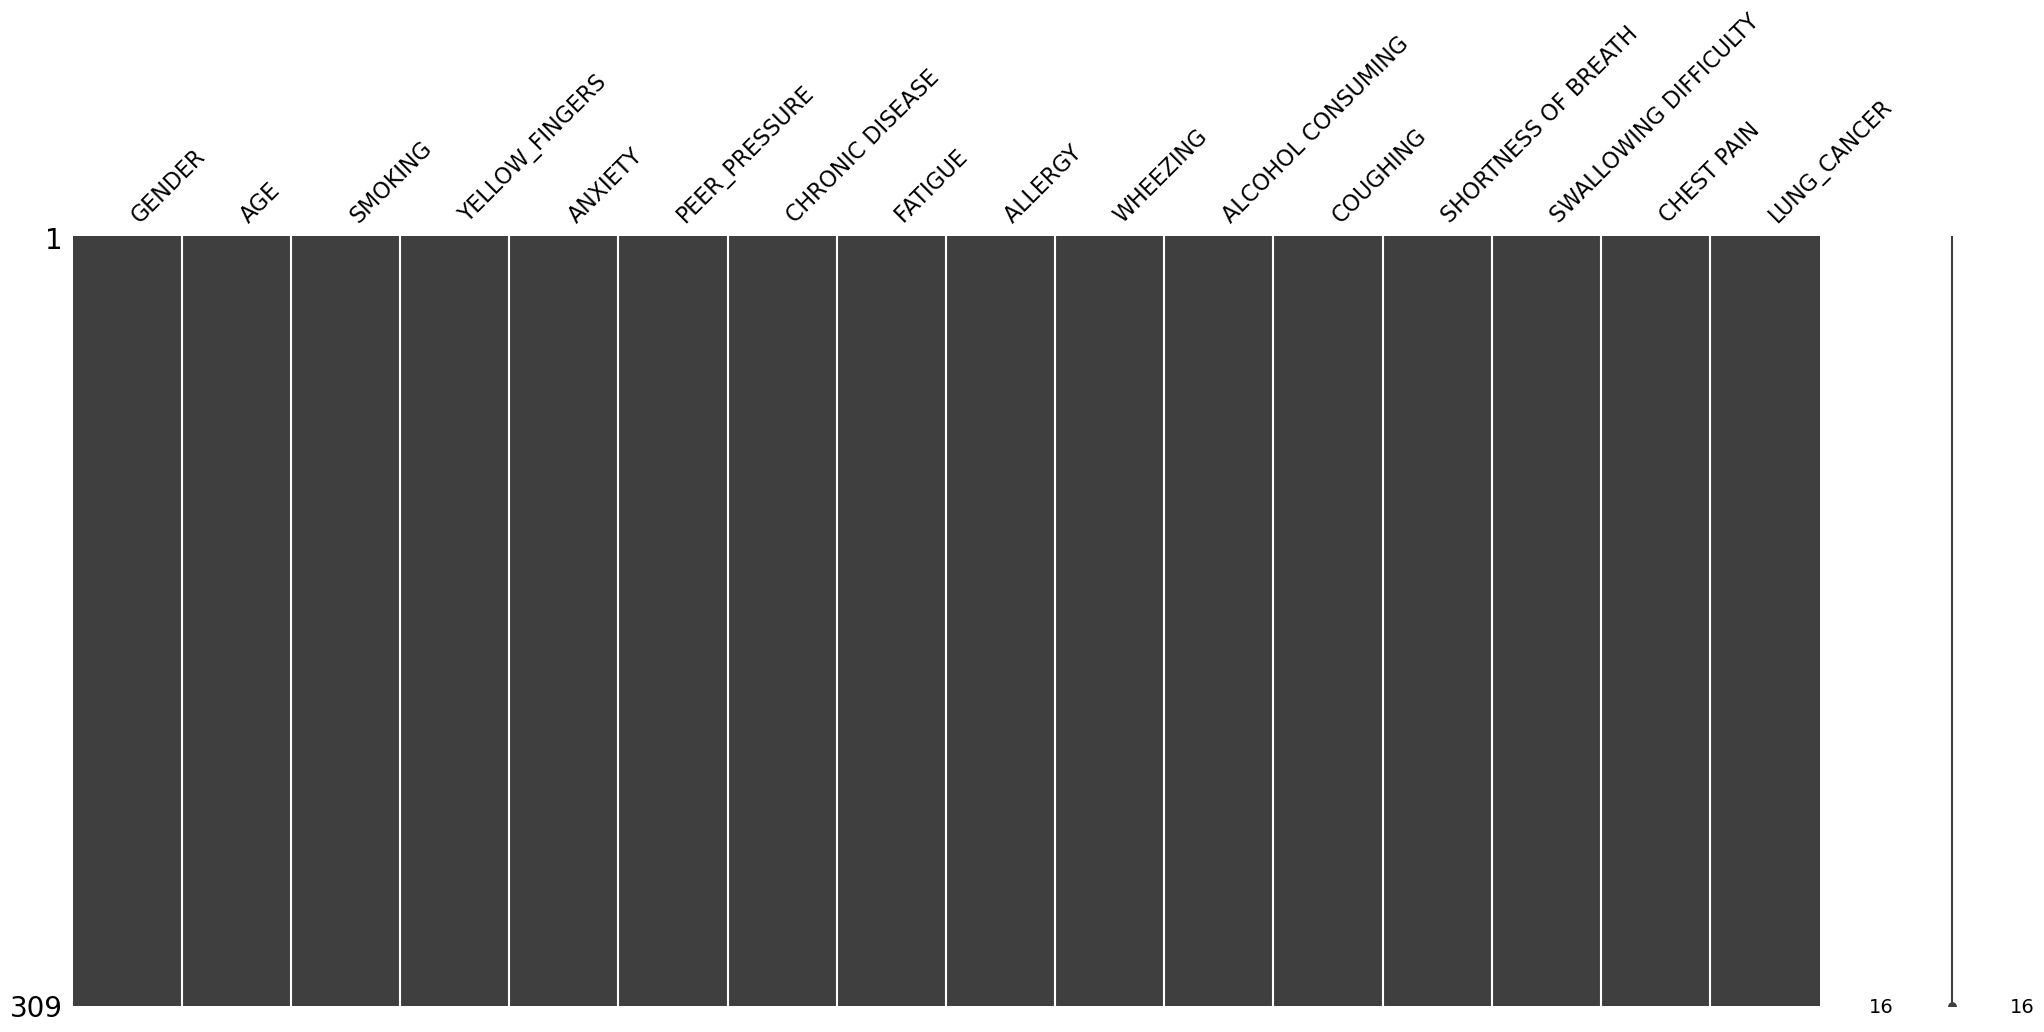

In [36]:
mis.matrix(df , filter="bottom");

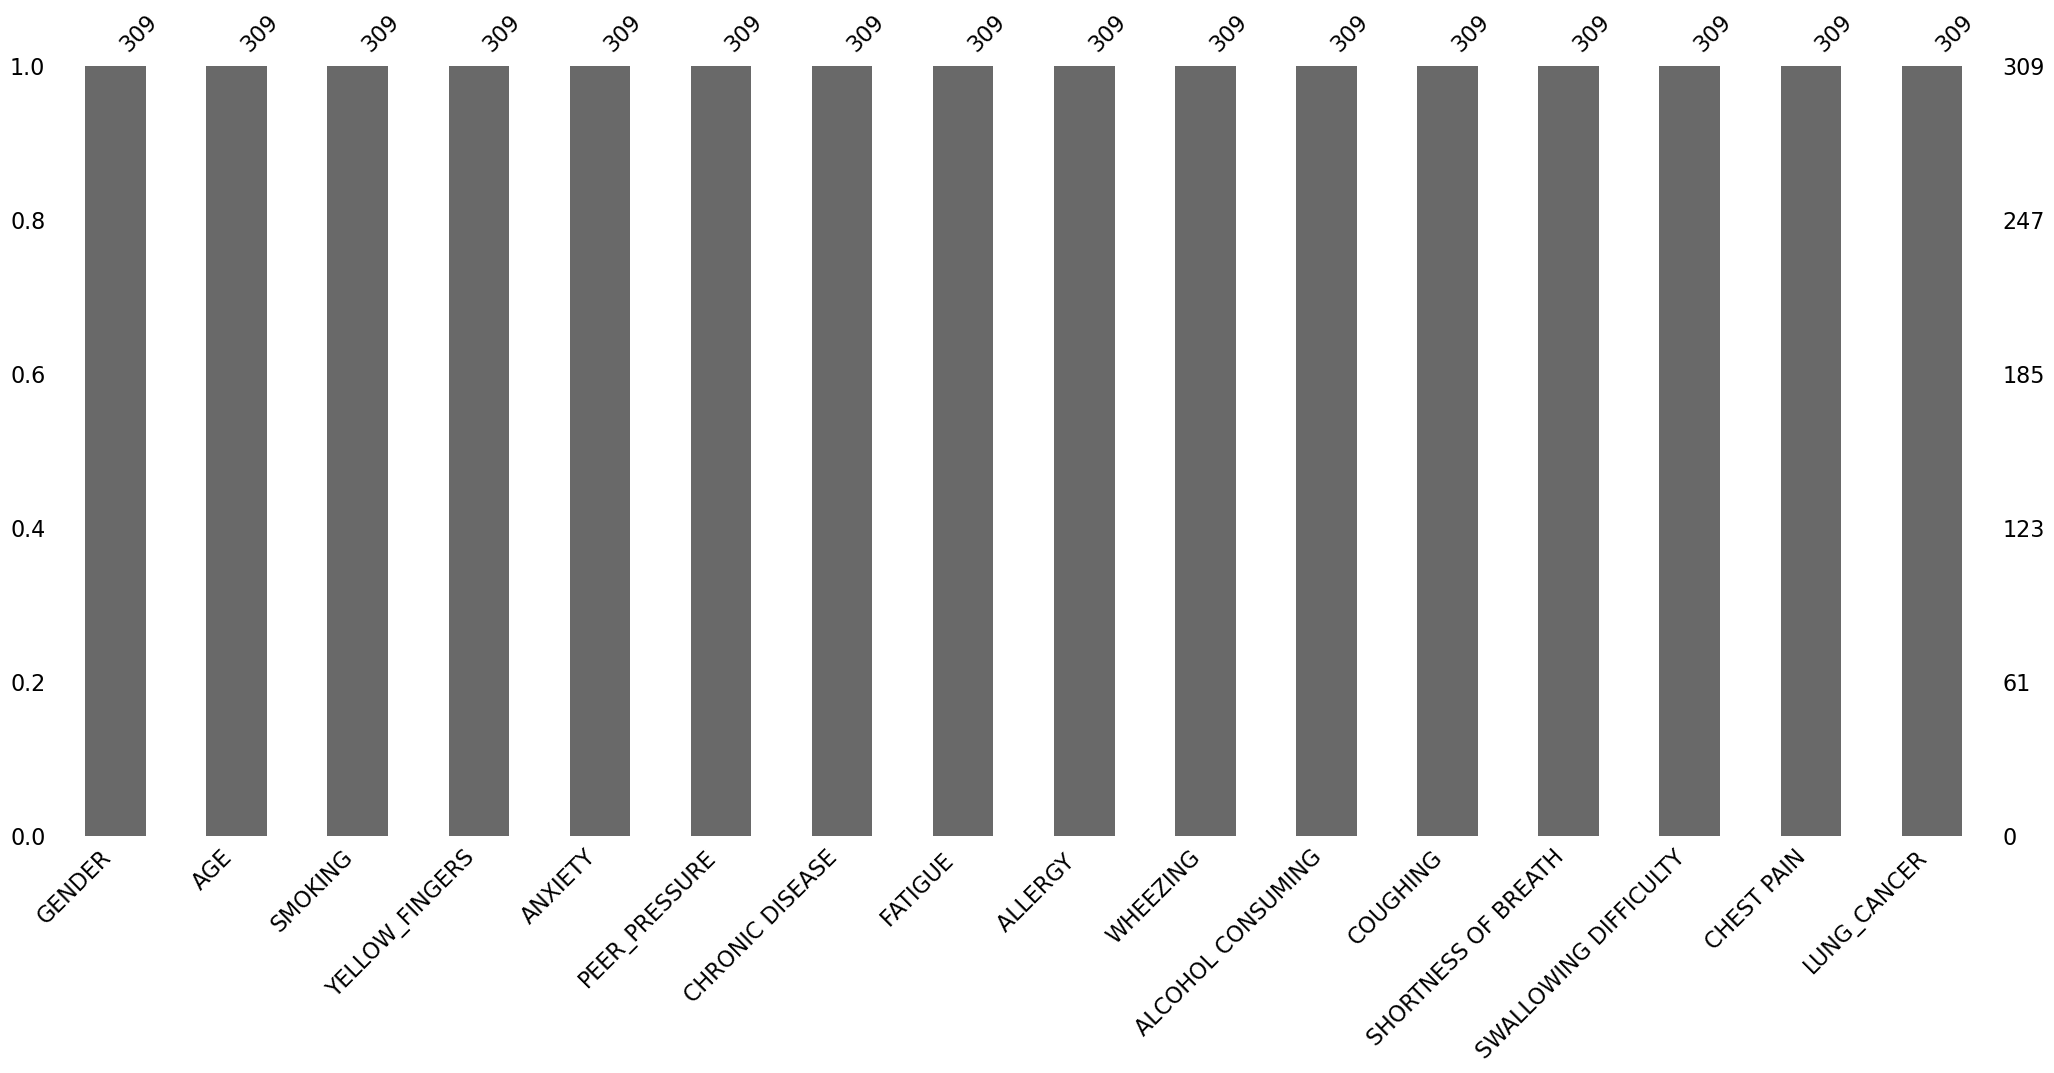

In [37]:
mis.bar(df , filter="bottom");

## Feature Engineering

In [38]:
df['ANXYELFIN']=df['ANXIETY']*df['YELLOW_FINGERS']
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,4
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,4
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,2


In [39]:
df.shape

(309, 17)

In [40]:
# Check duplicate
df.duplicated().sum()

33

In [41]:
# remove duplicates
df = df.drop_duplicates()
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,4
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,4
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES,4
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO,1
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO,1
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO,4


In [42]:
# After remove duplicates
df.duplicated().sum()

0

## Split Data

In [43]:
X = df.drop(["LUNG_CANCER"] , axis=1)   # Features
y = df["LUNG_CANCER"]   # Target

encode = LabelEncoder()
y = encode.fit_transform(y)


In [44]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=123)

print(f"X Train Shape Is ====> {X_train.shape}")
print(f"X test Shape Is ====> {X_test.shape}")
print(f"y train Shape Is ====> {y_train.shape}")
print(f"y test Shape Is ====> {y_test.shape}")

X Train Shape Is ====> (220, 16)
X test Shape Is ====> (56, 16)
y train Shape Is ====> (220,)
y test Shape Is ====> (56,)


In [45]:
nums_cols = [col for col in X_train.columns if X_train[col].dtype in ["int32" , "int64" , "float32" , "float64"] ]
nums_cols

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'ANXYELFIN']

In [46]:
catg_cols = [col for col in X_train.columns if X_train[col].dtype not in ["int32" , "int64" , "float32" , "float64"] ]
catg_cols

['GENDER']

In [47]:
le = {}

for col in catg_cols:
    unique_values = list(X_train[col].unique()) + list(X_test[col].unique())
    le[col] = LabelEncoder()
    le[col].fit(unique_values)
    
    X_train[col] = le[col].transform(X_train[col])
    X_test[col] = le[col].transform(X_test[col])


In [48]:
scale = StandardScaler()
scale.fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [49]:
imputer = SimpleImputer(missing_values=np.nan , strategy="median")
imputer.fit(X_train)

X_train_final = imputer.transform(X_train)
X_test_final = imputer.transform(X_test)



### Mutual information (MI) is a measure from information theory that quantifies the amount of information obtained about one random variable through another random variable. In the context of feature selection and classification, mutual information measures how much knowing the value of a feature reduces the uncertainty about the target variable.

In [50]:
X_train_final_df = pd.DataFrame(X_train_final, columns=X.columns)
X_test_final_df = pd.DataFrame(X_test_final, columns=X.columns)


discrete_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
                    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANXYELFIN']

discrete_features = [col in discrete_columns for col in X_train_final_df.columns]

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    return mi_scores

# Assuming y_train is your target variable
mi_scores = make_mi_scores(X_train_final_df, y_train, discrete_features)
print(mi_scores)


GENDER                   0.000379
AGE                      0.008954
SMOKING                  0.000284
YELLOW_FINGERS           0.023279
ANXIETY                  0.010000
PEER_PRESSURE            0.011060
CHRONIC DISEASE          0.008361
FATIGUE                  0.000000
ALLERGY                  0.060462
WHEEZING                 0.025335
ALCOHOL CONSUMING        0.041656
COUGHING                 0.030584
SHORTNESS OF BREATH      0.003875
SWALLOWING DIFFICULTY    0.029563
CHEST PAIN               0.012605
ANXYELFIN                0.026303
Name: MI Scores, dtype: float64


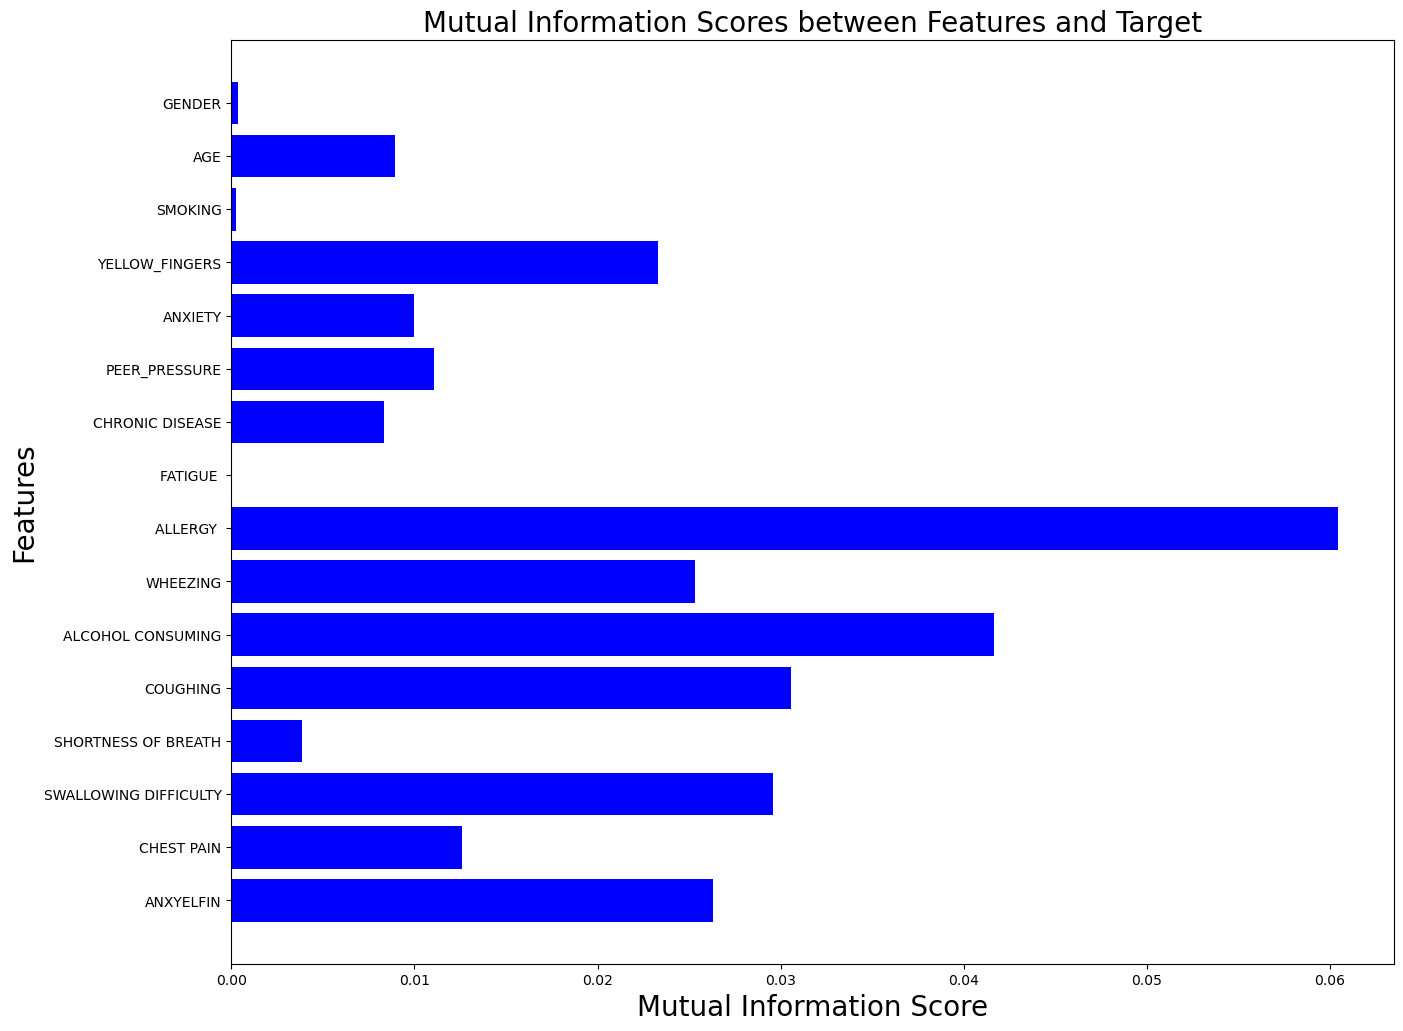

In [51]:
plt.figure(figsize=(15,12))
plt.barh(mi_scores.index , mi_scores.values , color="blue")
plt.xlabel('Mutual Information Score' , fontsize=20)
plt.ylabel('Features' , fontsize=20)
plt.title('Mutual Information Scores between Features and Target' , fontsize=20)
plt.gca().invert_yaxis()  # To display the highest scores at the top
plt.show()

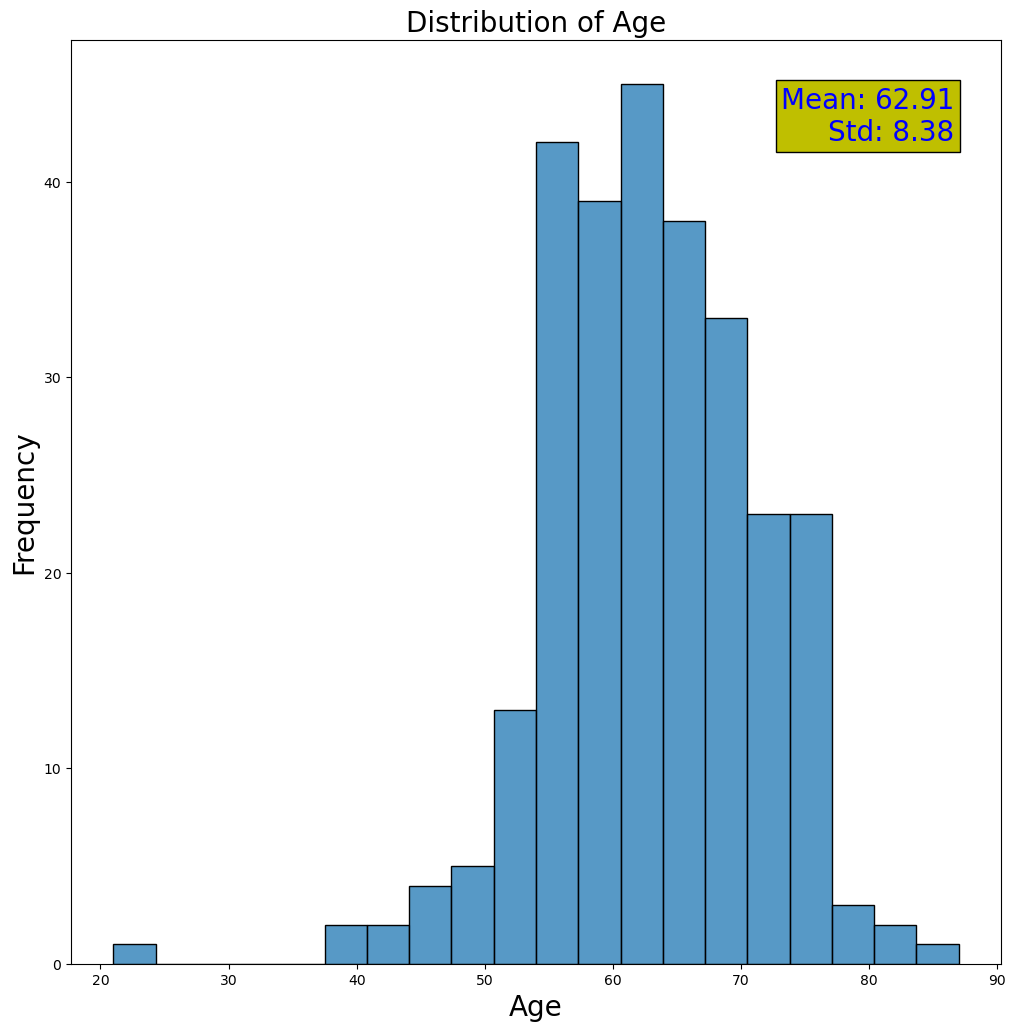

In [52]:
# Calculate mean and standard deviation
mean_age = df['AGE'].mean()
std_age = df['AGE'].std()



plt.figure(figsize = (12,12))
sns.histplot(df['AGE'])
plt.title('Distribution of Age' , fontsize=20)
plt.xlabel('Age' , fontsize=20)
plt.ylabel('Frequency' , fontsize=20)

# Add mean and standard deviation text
plt.text(x=0.95, y=0.95, s=f'Mean: {mean_age:.2f}\nStd: {std_age:.2f}', 
         horizontalalignment='right', 
         verticalalignment='top', 
         transform=plt.gca().transAxes,
         fontsize=20, 
         color="b", 
         bbox=dict(facecolor='y', alpha=1))

# Display the plot
plt.show()

plt.show()

# The Model & Hyperparameters Tunning¶

In [53]:
random_forest = RandomForestClassifier()

In [54]:
param = {
    "n_estimators" : [col for col in range(100 , 500 , 50)],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [col for col in range(2 , 12 , 2)],
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(1, 5, 1),
}

score = make_scorer(balanced_accuracy_score)

grid_sc = RandomizedSearchCV(estimator=random_forest , param_distributions=param ,scoring=score ,
                             n_iter=12 , n_jobs=-1 , cv=5 , verbose=1)

grid_sc.fit(X_train_final , y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450]},
                   scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
                   verbose=1)

In [55]:
best_para = grid_sc.best_estimator_
best_para

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=450)

In [56]:
grid_sc.best_params_

{'n_estimators': 450,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'log_loss'}

In [57]:
cro_val = cross_val_score(estimator=random_forest , X=X_train_final , y=y_train ,
                          cv=5 , scoring="balanced_accuracy" , n_jobs=-1)


print("Score is ==>>\n ",abs(cro_val))

print("cross val score mean is ==>> ",cro_val.mean())

Score is ==>>
  [0.65350877 0.82017544 0.64035088 0.72368421 0.67374517]
cross val score mean is ==>>  0.7022928943981575


In [58]:
cor_val_pred = cross_val_predict(estimator=random_forest , X=X_train_final , y=y_train,
                                cv=5 , n_jobs=-1 , method="predict")


# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cor_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.3438


In [59]:
mylist =df.columns

filtered_columns = []

for i in mylist:
    if i != "LUNG_CANCER":
        filtered_columns.append(i)
        
filtered_columns = pd.Index(filtered_columns)
print(filtered_columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANXYELFIN'],
      dtype='object')


In [60]:
importance = grid_sc.best_estimator_.feature_importances_

for f , i in zip(filtered_columns , importance):
    print(f"{f} ==> {i * 100:.2f} %")

GENDER ==> 2.64 %
AGE ==> 12.38 %
SMOKING ==> 3.14 %
YELLOW_FINGERS ==> 6.07 %
ANXIETY ==> 3.07 %
PEER_PRESSURE ==> 5.65 %
CHRONIC DISEASE ==> 6.17 %
FATIGUE  ==> 8.34 %
ALLERGY  ==> 12.69 %
WHEEZING ==> 4.78 %
ALCOHOL CONSUMING ==> 9.74 %
COUGHING ==> 5.73 %
SHORTNESS OF BREATH ==> 3.59 %
SWALLOWING DIFFICULTY ==> 4.77 %
CHEST PAIN ==> 2.62 %
ANXYELFIN ==> 8.62 %


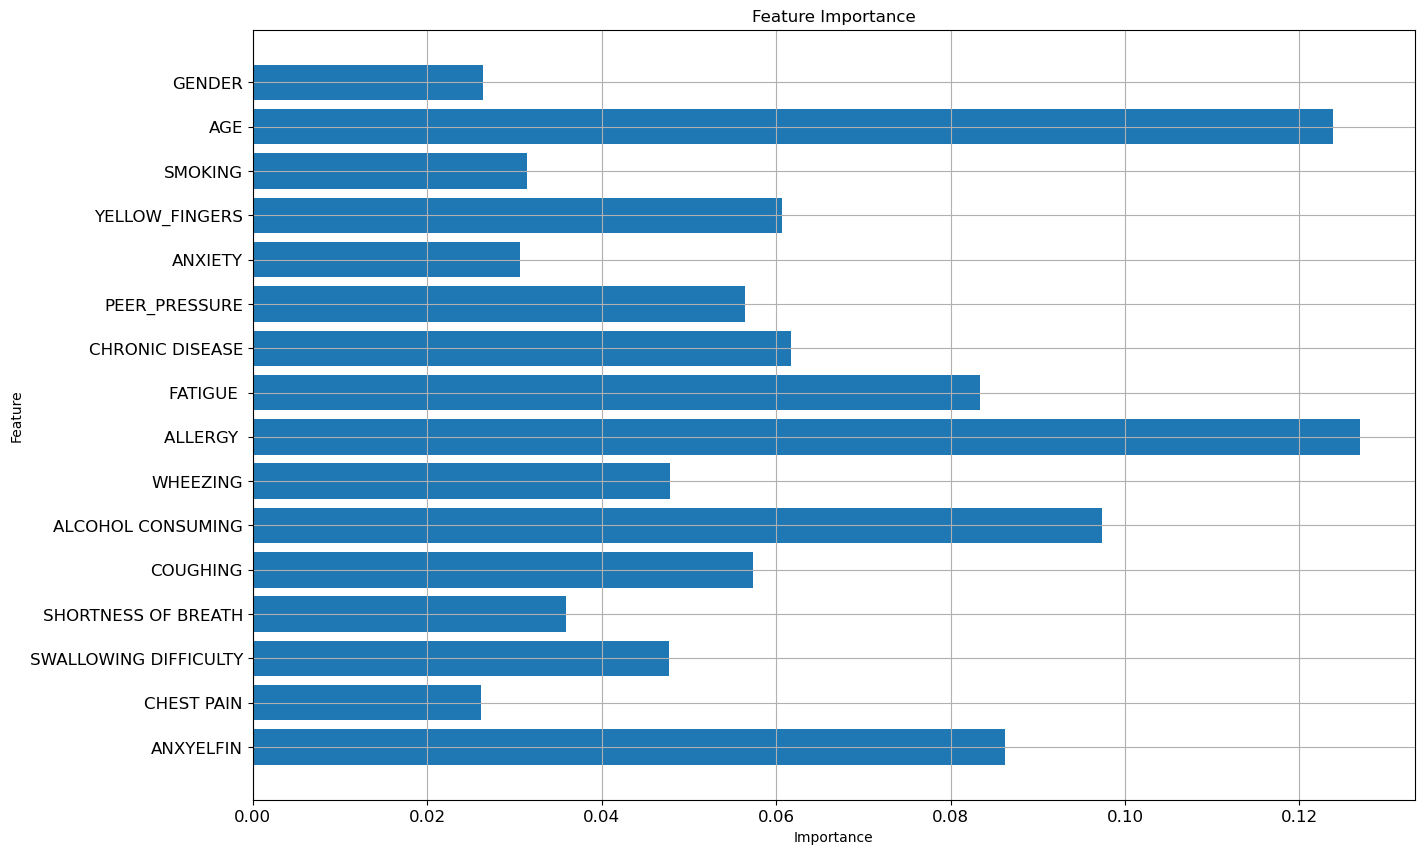

In [61]:
plt.figure(figsize=(15,10))

plt.barh(filtered_columns , importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.grid(True)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

In [62]:
y_pred = grid_sc.predict(X_test_final)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [63]:
# prediction
res =  pd.DataFrame(np.c_[y_pred, y_test], columns=["Prediction", "Actual"])
res

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,1
7,0,0
8,1,1
9,1,1


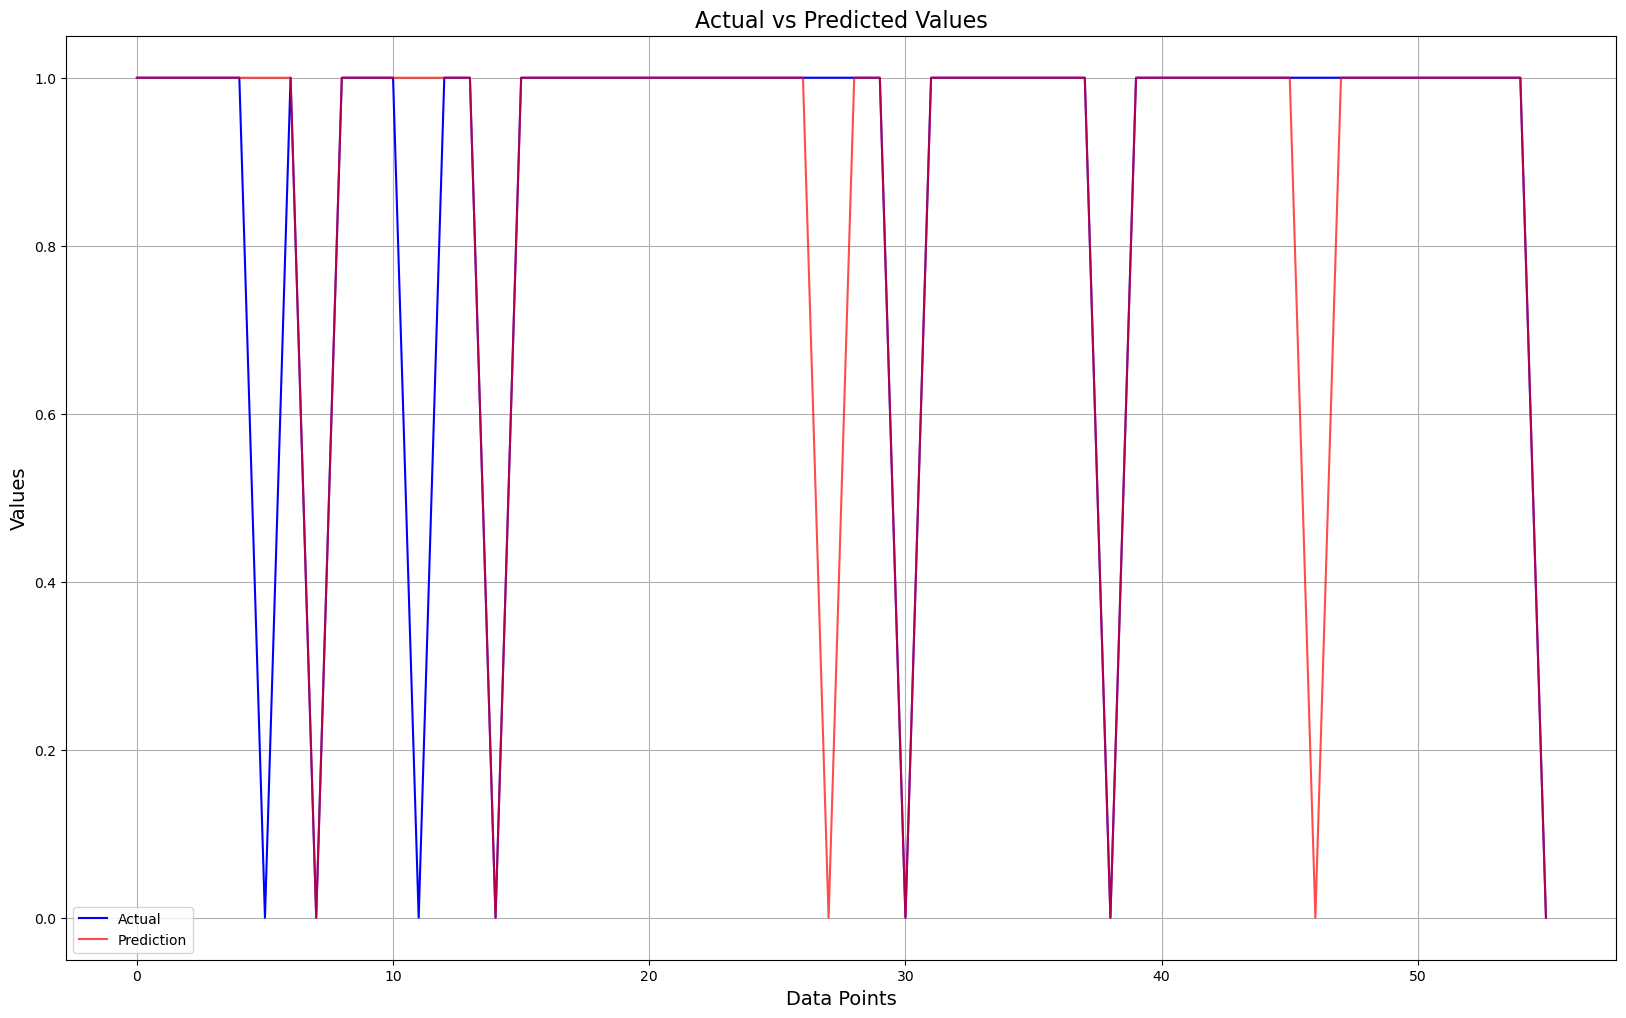

In [64]:
plt.figure(figsize=(20, 12))
plt.plot(res['Actual'], label='Actual', color='blue')
plt.plot(res['Prediction'], label='Prediction', color='red', alpha=0.7)

plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [65]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 5,  2],
       [ 2, 47]], dtype=int64)

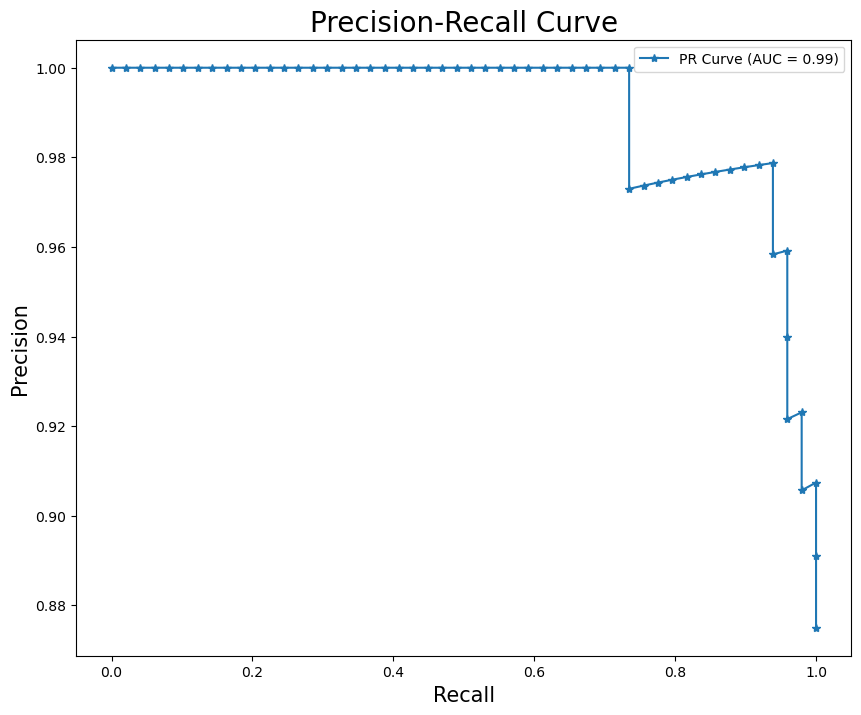

In [66]:

y_scores = grid_sc.predict_proba(X_test_final)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='*', label=f'PR Curve (AUC = {pr_auc:.2f})')

plt.title('Precision-Recall Curve', fontsize=20)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.legend()

# Display the plot
plt.show()


In [67]:
print(f" some details \n {classification_report(y_test , y_pred)}")


 some details 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.96      0.96      0.96        49

    accuracy                           0.93        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.93      0.93      0.93        56



In [68]:
# the scores
print(f"The Score On The Train => {best_para.score(X_train_final, y_train)*100:0.2f} %")
print(f"The Score On The Test => {best_para.score(X_test_final, y_test)*100:0.2f} %")

The Score On The Train => 96.82 %
The Score On The Test => 92.86 %


# ْXGBClassifier

In [69]:
model_xgbclass = XGBClassifier()
model_xgbclass

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
param = {
    "n_estimators": np.arange(50, 200, 10),
    "max_depth": np.arange(2, 10, 1),
    "learning_rate": np.arange(0.01, 0.1, 0.01),
    "subsample": np.arange(0.2, 1.0, 0.1),
    "alpha": np.arange(0.1, 1.0, 0.1)
}

scores = make_scorer(balanced_accuracy_score)

rand_xg = RandomizedSearchCV(estimator=model_xgbclass , param_distributions=param , 
                            scoring=scores , n_jobs=-1 , cv=5 , n_iter=100 , verbose=1 )

rand_xg.fit(X_train_final, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
                   verbose=1)

In [71]:
best_para_xgb = rand_xg.best_estimator_
best_para_xgb

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, ...)

In [72]:
rand_xg.best_params_

{'subsample': 0.6000000000000001,
 'n_estimators': 180,
 'max_depth': 2,
 'learning_rate': 0.08,
 'alpha': 0.1}

In [73]:
cro_val = cross_val_score(estimator=model_xgbclass , X=X_train_final , y=y_train ,
                          cv=5 , scoring="balanced_accuracy" , n_jobs=-1)


print("Score is ==>>\n ",abs(cro_val))

print("cross val score mean is ==>> ",cro_val.mean())

Score is ==>>
  [0.73684211 0.79385965 0.65350877 0.80701754 0.83011583]
cross val score mean is ==>>  0.7642687800582537


In [74]:
cor_val_pred = cross_val_predict(estimator=model_xgbclass , X=X_train_final , y=y_train,
                                cv=5 , n_jobs=-1 , method="predict")


# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cor_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.3162


In [75]:
mylist =df.columns

filtered_columns = []

for i in mylist:
    if i != "LUNG_CANCER":
        filtered_columns.append(i)
        
filtered_columns = pd.Index(filtered_columns)
print(filtered_columns)



Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANXYELFIN'],
      dtype='object')


In [76]:

importance = rand_xg.best_estimator_.feature_importances_

for f , i in zip(filtered_columns , importance):
    print(f"{f} ==> {i * 100:.2f} %")

GENDER ==> 3.38 %
AGE ==> 2.93 %
SMOKING ==> 2.90 %
YELLOW_FINGERS ==> 9.10 %
ANXIETY ==> 2.90 %
PEER_PRESSURE ==> 6.29 %
CHRONIC DISEASE ==> 5.95 %
FATIGUE  ==> 8.37 %
ALLERGY  ==> 13.72 %
WHEEZING ==> 6.95 %
ALCOHOL CONSUMING ==> 6.98 %
COUGHING ==> 5.97 %
SHORTNESS OF BREATH ==> 3.25 %
SWALLOWING DIFFICULTY ==> 11.22 %
CHEST PAIN ==> 3.71 %
ANXYELFIN ==> 6.37 %


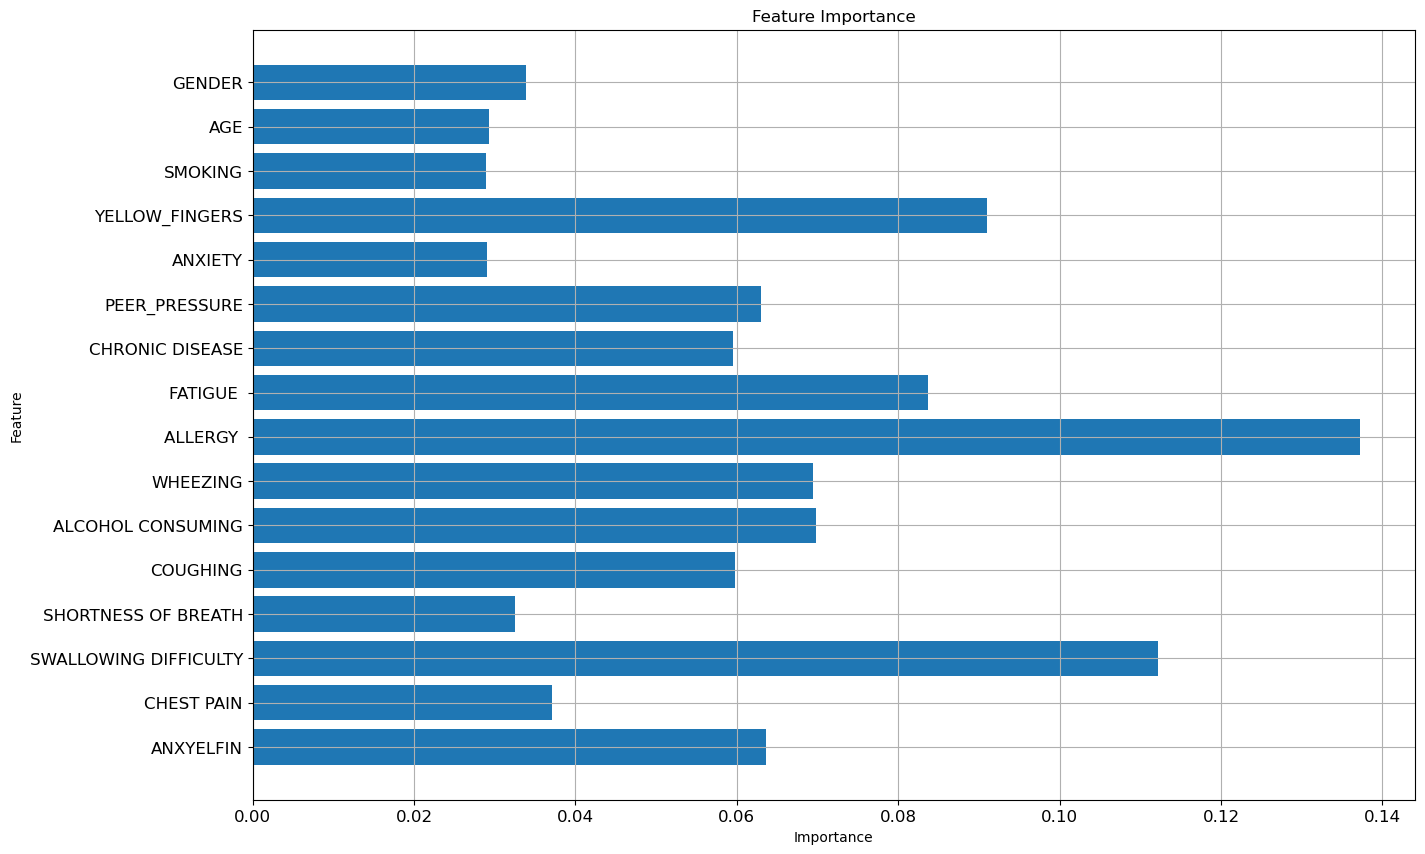

In [77]:
plt.figure(figsize=(15,10))

plt.barh(filtered_columns , importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.grid(True)
plt.xticks(color="k", fontsize=12)
plt.yticks(color="k", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

In [78]:
y_pred = rand_xg.predict(X_test_final)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [79]:
# prediction
results = pd.DataFrame(np.c_[y_pred, y_test], columns=["Prediction", "Actual"])
results

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,1
7,0,0
8,1,1
9,1,1


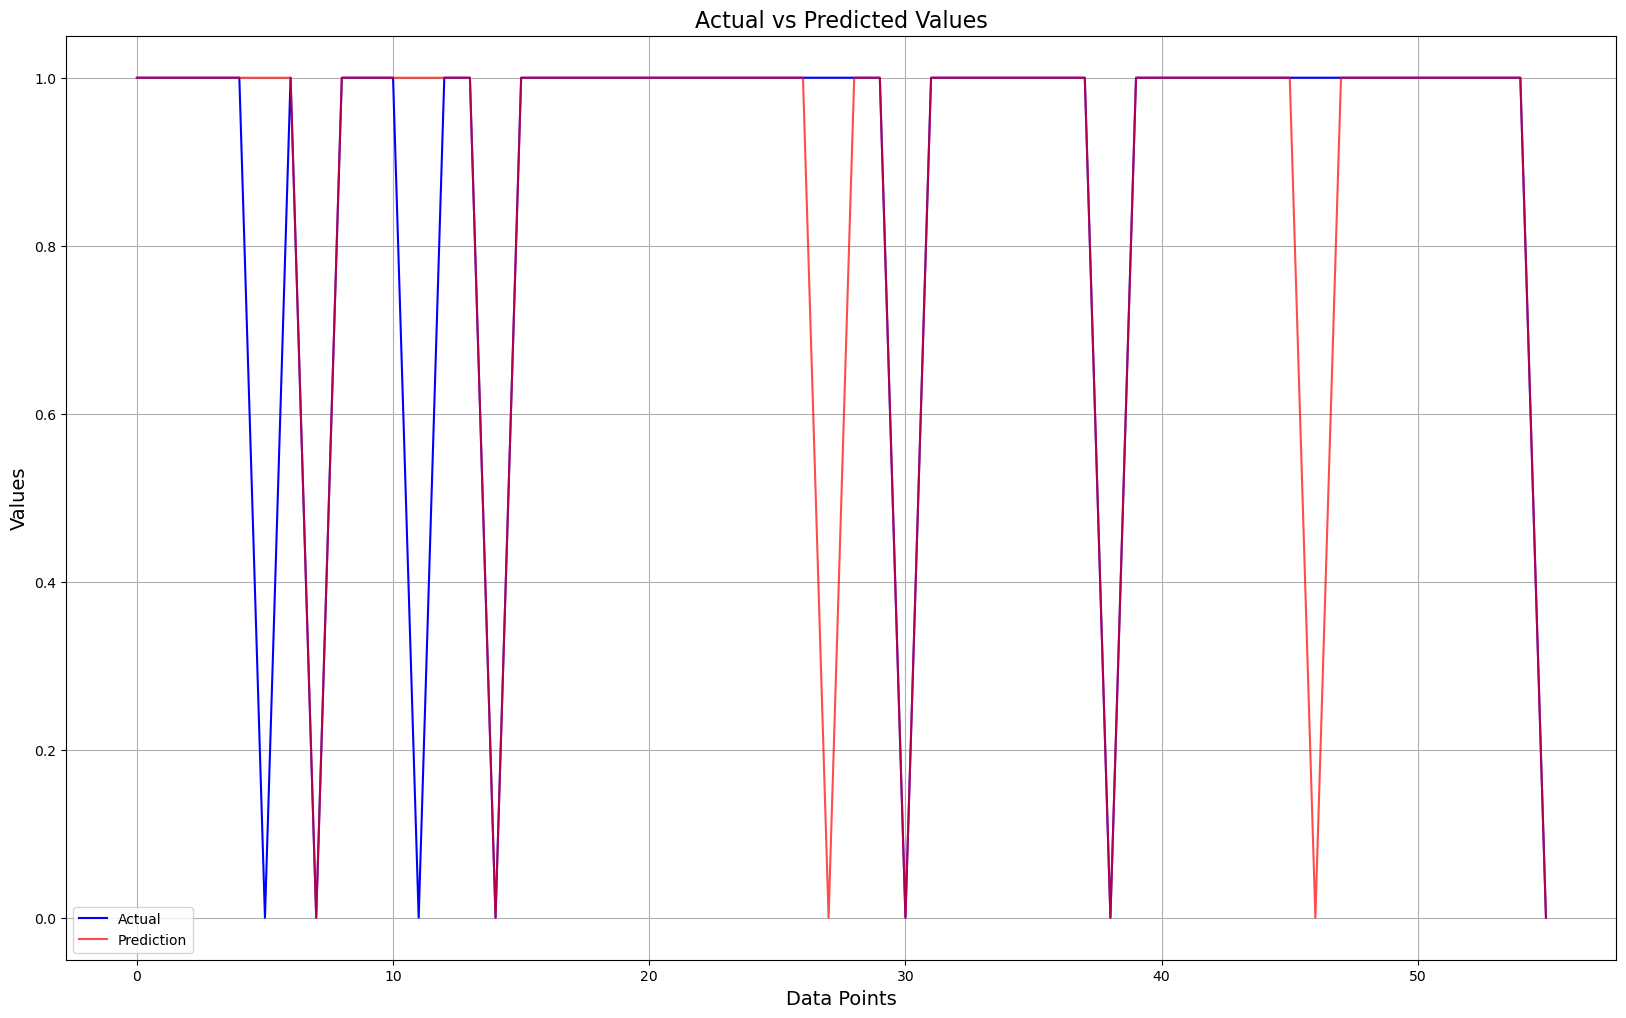

In [80]:
plt.figure(figsize=(20, 12))
plt.plot(results['Actual'], label='Actual', color='blue')
plt.plot(results['Prediction'], label='Prediction', color='red', alpha=0.7)

plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [81]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 5,  2],
       [ 2, 47]], dtype=int64)

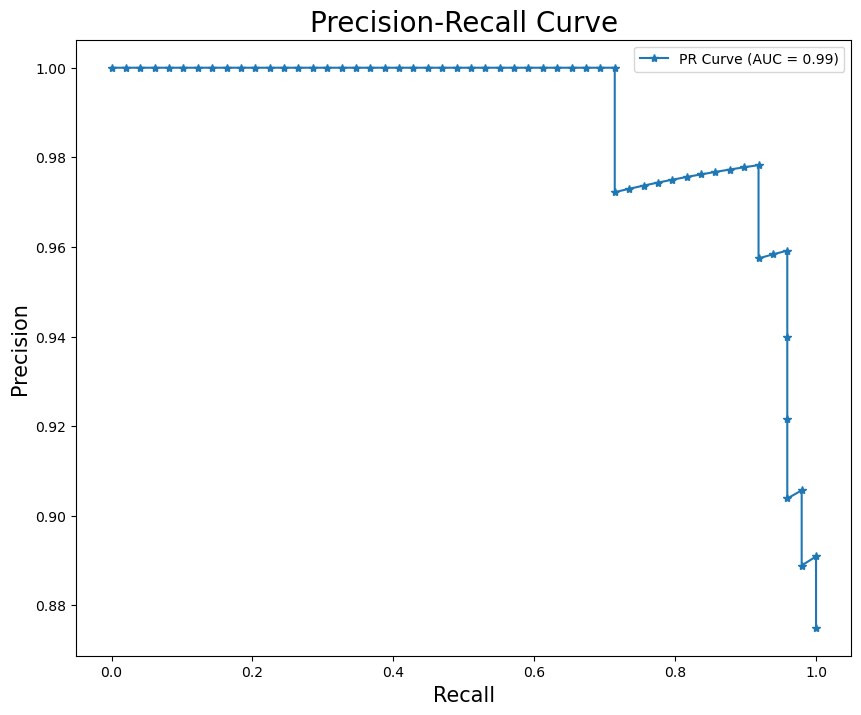

In [82]:

y_scores = rand_xg.predict_proba(X_test_final)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='*', label=f'PR Curve (AUC = {pr_auc:.2f})')

plt.title('Precision-Recall Curve', fontsize=20)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.legend()

# Display the plot
plt.show()


In [83]:
print(f" some details \n {classification_report(y_test , y_pred)}")


 some details 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.96      0.96      0.96        49

    accuracy                           0.93        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.93      0.93      0.93        56



In [84]:
# the scores
print(f"The Score On The Train => {best_para_xgb.score(X_train_final, y_train)*100:0.2f} %")
print(f"The Score On The Test => {best_para_xgb.score(X_test_final, y_test)*100:0.2f} %")

The Score On The Train => 95.00 %
The Score On The Test => 92.86 %


# End